
## NB and Logistic Regression Project


Dataset: Network Attack – NB15
https://drive.google.com/file/d/1ShCdA6zUuGnBEcp6tS1P2HqxJZemw1mp/view?usp=drive_link

The raw network packets of the UNSW-NB 15 dataset was created by the IXIA PerfectStorm tool in
the Cyber Range Lab of the Australian Centre for Cyber Security (ACCS) for generating a hybrid of real
modern normal activities and synthetic contemporary attack behaviours.
Tcpdump tool is utilised to capture the raw traffic (e.g., Pcap files). This dataset has nine types of
attacks, namely, Fuzzers, Analysis, Backdoors, DoS, Exploits, Generic, Reconnaissance, Shellcode and
Worms. The Argus, Bro-IDS tools are used and twelve algorithms are developed to generate totally 49
features with the class label.

These features are described in UNSW-NB15_features.csv file.
https://drive.google.com/file/d/1xeUOrtcYz_E6yBsgP-odx4OjjA8VzSPj/view?usp=drive_link

Goal is to build a classification model which will classify the 9 different attacks.
1. EDA and basic data pre-processing and preparation
a. Null/Outlier Treatment
b. Remove non-Important Features
c. Split training and testing data set
d. Standardize/Normalize the Variables whenever required.
2. Train model using suitable variation of NB and logistic regression (use sklearn?)
3. Compare accuracy of different approaches
4. Apply feature reduction techniques
5. Train model on the reduced feature subset using NB and Logistic regression
6. Comment on performance of these approaches (NB and Logistic Regression) on reduced
dataset (after applying PCA/feature reduction)

# Solution

## Prerequisites
### Download the dataset



Connect to the drive to load data from source file

In [510]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Load the data into pandas dataframe df

In [292]:
import pandas as pd

# import the dataset
df = pd.read_csv('/content/drive/MyDrive/Assignment_2_Classification/Network_attacks_UNSW_NB15.csv')

In [294]:
df_bkup1 = df.copy()

### Import the required libraries

In [296]:
#Load the necessary python libraries
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

from sklearn.model_selection import train_test_split
import seaborn as sns

#from sklearn.metrics import roc_auc_score
#from sklearn.metrics import roc_curve

#import scipy.stats as stats
#import statsmodels.api as sm

#from sklearn.preprocessing import FunctionTransformer
#from sklearn.compose import ColumnTransformer


from sklearn.naive_bayes import MultinomialNB, BernoulliNB, GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import minmax_scale, LabelEncoder

# from numpy import asarray
# from sklearn.preprocessing import MinMaxScaler


sns.set_theme()
sns.set_palette(palette = "rainbow")
%matplotlib inline

## 1 - EDA and basic data pre-processing and preparation
a. Null/Outlier Treatment

b. Remove non-Important Features

c. Split training and testing data set

d. Standardize/Normalize the Variables whenever required.


In [297]:
df.head()

id       dur proto service state  spkts  dpkts  sbytes  dbytes       rate  \
0   1  0.121478   tcp       -   FIN      6      4     258     172  74.087490   
1   2  0.649902   tcp       -   FIN     14     38     734   42014  78.473372   
2   3  1.623129   tcp       -   FIN      8     16     364   13186  14.170161   
3   4  1.681642   tcp     ftp   FIN     12     12     628     770  13.677108   
4   5  0.449454   tcp       -   FIN     10      6     534     268  33.373826   

   ...  ct_src_dport_ltm  ct_dst_sport_ltm  ct_dst_src_ltm  is_ftp_login  \
0  ...                 1                 1               1             0   
1  ...                 1                 1               2             0   
2  ...                 1                 1               3             0   
3  ...                 1                 1               3             1   
4  ...                 2                 1              40             0   

   ct_ftp_cmd  ct_flw_http_mthd  ct_src_ltm  ct_srv_dst  is_sm_ips_ports  \
0           0                 0           1           1                0   
1           0                 0           1           6                0   
2           0                 0           2           6                0   
3           1                 0           2           1                0   
4           0                 0           2          39                0   

   attack_cat  
0      Normal  
1      Normal  
2      Normal  
3      Normal  
4      Normal  

[5 rows x 44 columns]

In [299]:
df.columns

Index(['id', 'dur', 'proto', 'service', 'state', 'spkts', 'dpkts', 'sbytes',
       'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss',
       'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin',
       'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth',
       'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm',
       'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm',
       'ct_srv_dst', 'is_sm_ips_ports', 'attack_cat'],
      dtype='object')

In [298]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175341 entries, 0 to 175340
Data columns (total 44 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 175341 non-null  int64  
 1   dur                175341 non-null  float64
 2   proto              175341 non-null  object 
 3   service            175341 non-null  object 
 4   state              175341 non-null  object 
 5   spkts              175341 non-null  int64  
 6   dpkts              175341 non-null  int64  
 7   sbytes             175341 non-null  int64  
 8   dbytes             175341 non-null  int64  
 9   rate               175341 non-null  float64
 10  sttl               175341 non-null  int64  
 11  dttl               175341 non-null  int64  
 12  sload              175341 non-null  float64
 13  dload              175341 non-null  float64
 14  sloss              175341 non-null  int64  
 15  dloss              175341 non-null  int64  
 16  si

### a. Null/Outlier Treatment

In [300]:
# check any missing or null values
print(df.isnull().sum())

id                   0
dur                  0
proto                0
service              0
state                0
spkts                0
dpkts                0
sbytes               0
dbytes               0
rate                 0
sttl                 0
dttl                 0
sload                0
dload                0
sloss                0
dloss                0
sinpkt               0
dinpkt               0
sjit                 0
djit                 0
swin                 0
stcpb                0
dtcpb                0
dwin                 0
tcprtt               0
synack               0
ackdat               0
smean                0
dmean                0
trans_depth          0
response_body_len    0
ct_srv_src           0
ct_state_ttl         0
ct_dst_ltm           0
ct_src_dport_ltm     0
ct_dst_sport_ltm     0
ct_dst_src_ltm       0
is_ftp_login         0
ct_ftp_cmd           0
ct_flw_http_mthd     0
ct_src_ltm           0
ct_srv_dst           0
is_sm_ips_ports      0
attack_cat 

<font color="orange">Observations & Justifications:</font>
<font color="darkcyan"> As you can see There are no missing values.</font>

Find outliers

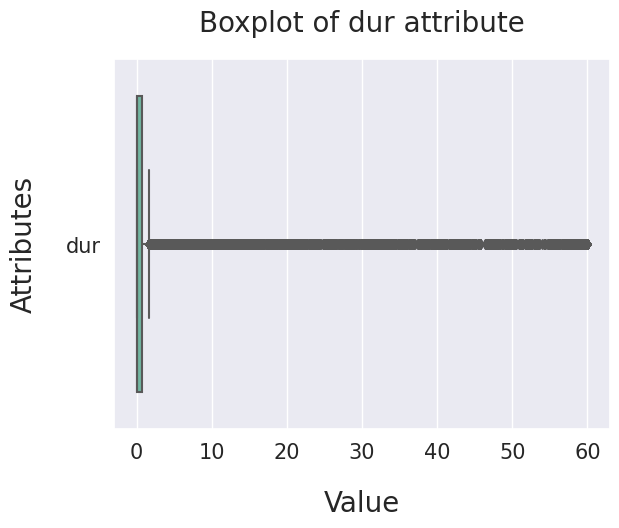

In [301]:
#create the boxplot for 'dur'
ax = sns.boxplot(data = df[["dur"]], orient = "h", palette = "Set2")
#add labels
ax.set_xlabel("Value", fontsize = 20, labelpad = 20)
ax.set_ylabel("Attributes", fontsize = 20, labelpad = 20)
ax.set_title("Boxplot of dur attribute", fontsize = 20,pad = 20)
#edit ticks
ax.tick_params(which = "both", labelsize = 15)

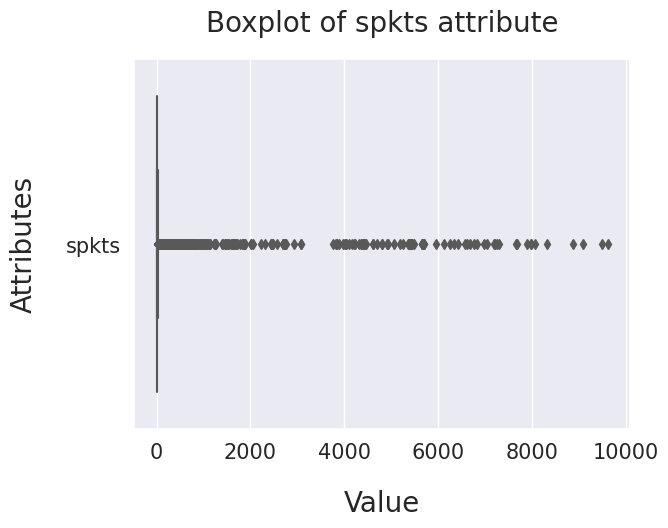

In [302]:
#create the boxplot for 'spkts'
ax = sns.boxplot(data = df[["spkts"]], orient = "h", palette = "Set2")
#add labels
ax.set_xlabel("Value", fontsize = 20, labelpad = 20)
ax.set_ylabel("Attributes", fontsize = 20, labelpad = 20)
ax.set_title("Boxplot of spkts attribute", fontsize = 20,pad = 20)
#edit ticks
ax.tick_params(which = "both", labelsize = 15)

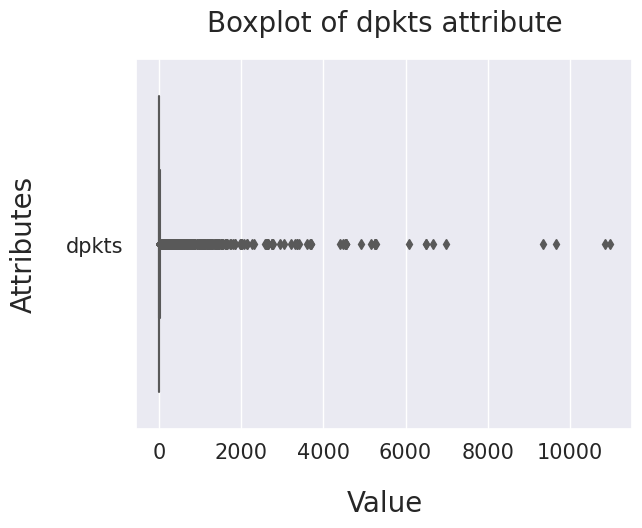

In [303]:
#create the boxplot for 'dpkts'
ax = sns.boxplot(data = df[["dpkts"]], orient = "h", palette = "Set2")
#add labels
ax.set_xlabel("Value", fontsize = 20, labelpad = 20)
ax.set_ylabel("Attributes", fontsize = 20, labelpad = 20)
ax.set_title("Boxplot of dpkts attribute", fontsize = 20,pad = 20)
#edit ticks
ax.tick_params(which = "both", labelsize = 15)

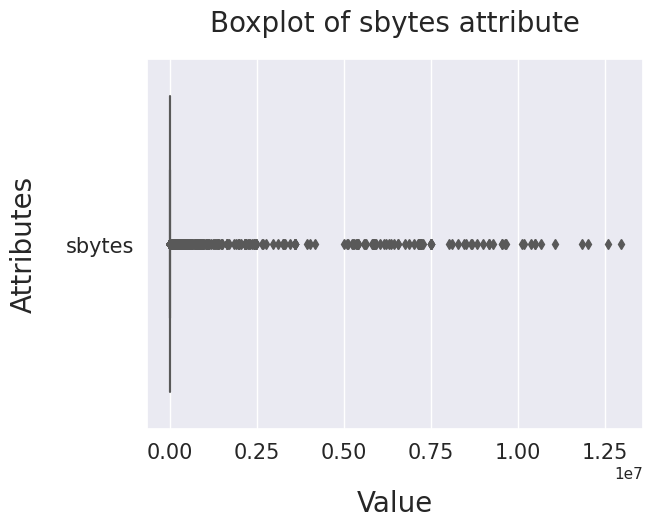

In [304]:
#create the boxplot for sbytes
ax = sns.boxplot(data = df[["sbytes"]], orient = "h", palette = "Set2")
#add labels
ax.set_xlabel("Value", fontsize = 20, labelpad = 20)
ax.set_ylabel("Attributes", fontsize = 20, labelpad = 20)
ax.set_title("Boxplot of sbytes attribute", fontsize = 20,pad = 20)
#edit ticks
ax.tick_params(which = "both", labelsize = 15)

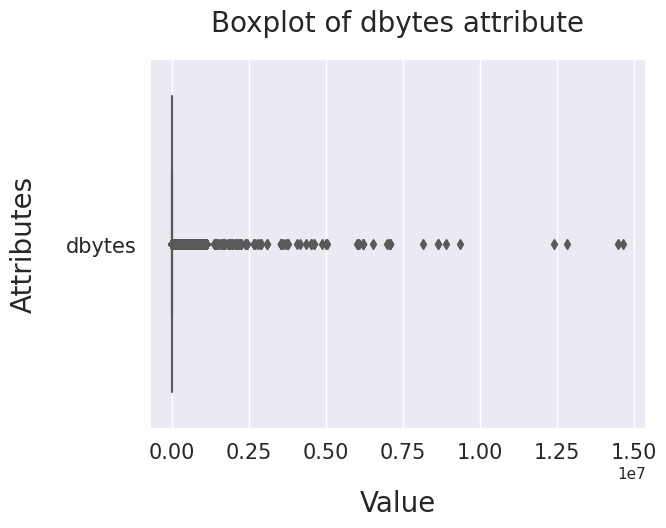

In [305]:
#create the boxplot for dbytes
ax = sns.boxplot(data = df[["dbytes"]], orient = "h", palette = "Set2")
#add labels
ax.set_xlabel("Value", fontsize = 20, labelpad = 20)
ax.set_ylabel("Attributes", fontsize = 20, labelpad = 20)
ax.set_title("Boxplot of dbytes attribute", fontsize = 20,pad = 20)
#edit ticks
ax.tick_params(which = "both", labelsize = 15)

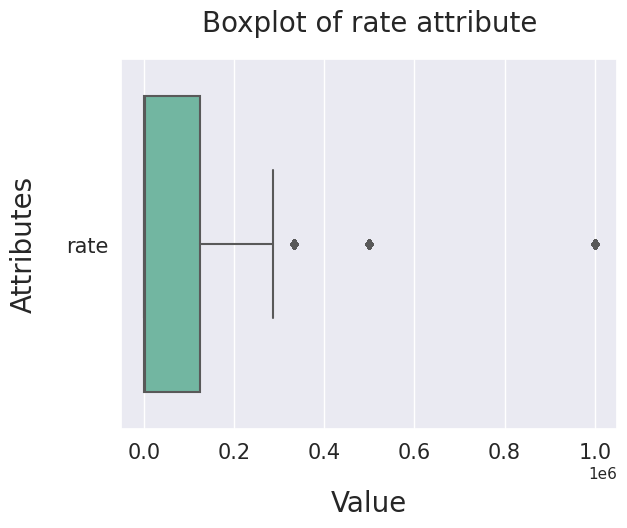

In [306]:
#create the boxplot for rate
ax = sns.boxplot(data = df[["rate"]], orient = "h", palette = "Set2")
#add labels
ax.set_xlabel("Value", fontsize = 20, labelpad = 20)
ax.set_ylabel("Attributes", fontsize = 20, labelpad = 20)
ax.set_title("Boxplot of rate attribute", fontsize = 20,pad = 20)
#edit ticks
ax.tick_params(which = "both", labelsize = 15)

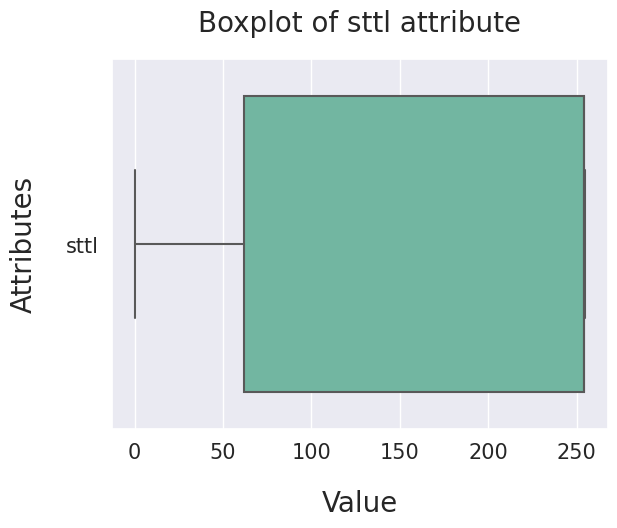

In [307]:
#create the boxplot for sttl
ax = sns.boxplot(data = df[["sttl"]], orient = "h", palette = "Set2")
#add labels
ax.set_xlabel("Value", fontsize = 20, labelpad = 20)
ax.set_ylabel("Attributes", fontsize = 20, labelpad = 20)
ax.set_title("Boxplot of sttl attribute", fontsize = 20,pad = 20)
#edit ticks
ax.tick_params(which = "both", labelsize = 15)

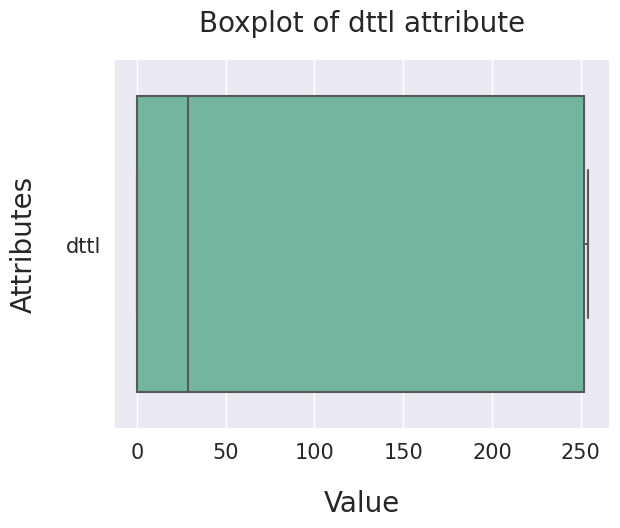

In [308]:
#create the boxplot for dttl
ax = sns.boxplot(data = df[["dttl"]], orient = "h", palette = "Set2")
#add labels
ax.set_xlabel("Value", fontsize = 20, labelpad = 20)
ax.set_ylabel("Attributes", fontsize = 20, labelpad = 20)
ax.set_title("Boxplot of dttl attribute", fontsize = 20,pad = 20)
#edit ticks
ax.tick_params(which = "both", labelsize = 15)

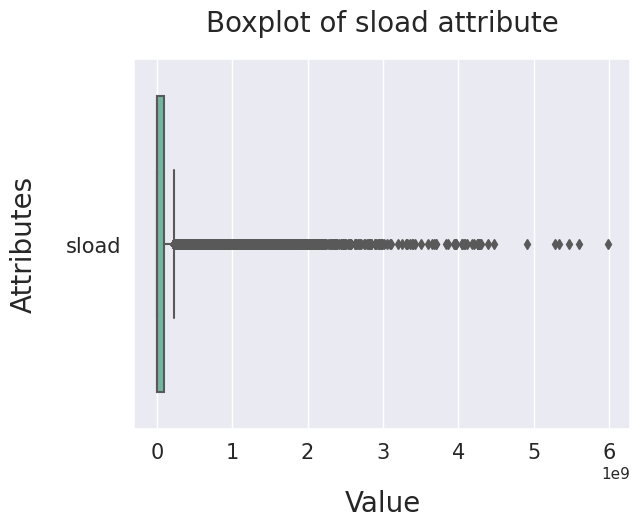

In [309]:
#create the boxplot for sload
ax = sns.boxplot(data = df[["sload"]], orient = "h", palette = "Set2")
#add labels
ax.set_xlabel("Value", fontsize = 20, labelpad = 20)
ax.set_ylabel("Attributes", fontsize = 20, labelpad = 20)
ax.set_title("Boxplot of sload attribute", fontsize = 20,pad = 20)
#edit ticks
ax.tick_params(which = "both", labelsize = 15)

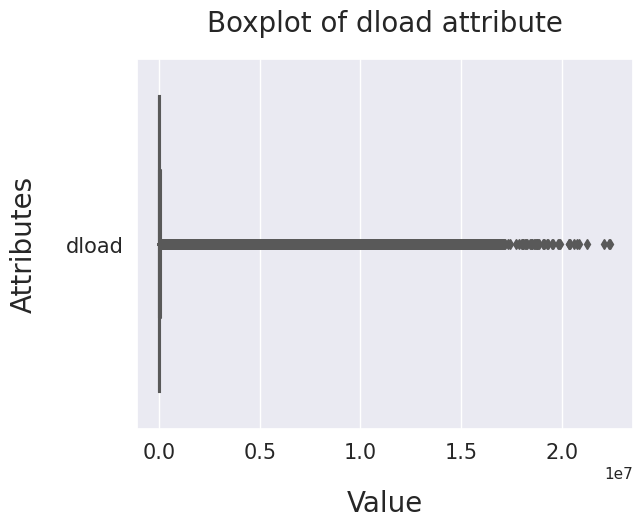

In [310]:
#create the boxplot for dload
ax = sns.boxplot(data = df[["dload"]], orient = "h", palette = "Set2")
#add labels
ax.set_xlabel("Value", fontsize = 20, labelpad = 20)
ax.set_ylabel("Attributes", fontsize = 20, labelpad = 20)
ax.set_title("Boxplot of dload attribute", fontsize = 20,pad = 20)
#edit ticks
ax.tick_params(which = "both", labelsize = 15)

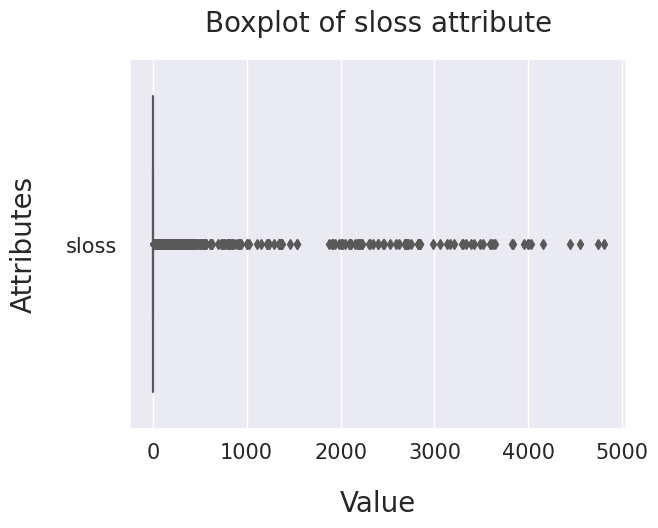

In [311]:
#create the boxplot for sloss
ax = sns.boxplot(data = df[["sloss"]], orient = "h", palette = "Set2")
#add labels
ax.set_xlabel("Value", fontsize = 20, labelpad = 20)
ax.set_ylabel("Attributes", fontsize = 20, labelpad = 20)
ax.set_title("Boxplot of sloss attribute", fontsize = 20,pad = 20)
#edit ticks
ax.tick_params(which = "both", labelsize = 15)

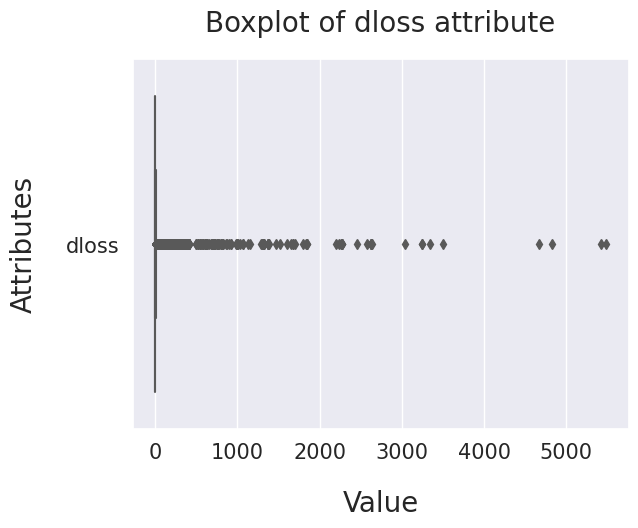

In [312]:
#create the boxplot for dloss
ax = sns.boxplot(data = df[["dloss"]], orient = "h", palette = "Set2")
#add labels
ax.set_xlabel("Value", fontsize = 20, labelpad = 20)
ax.set_ylabel("Attributes", fontsize = 20, labelpad = 20)
ax.set_title("Boxplot of dloss attribute", fontsize = 20,pad = 20)
#edit ticks
ax.tick_params(which = "both", labelsize = 15)

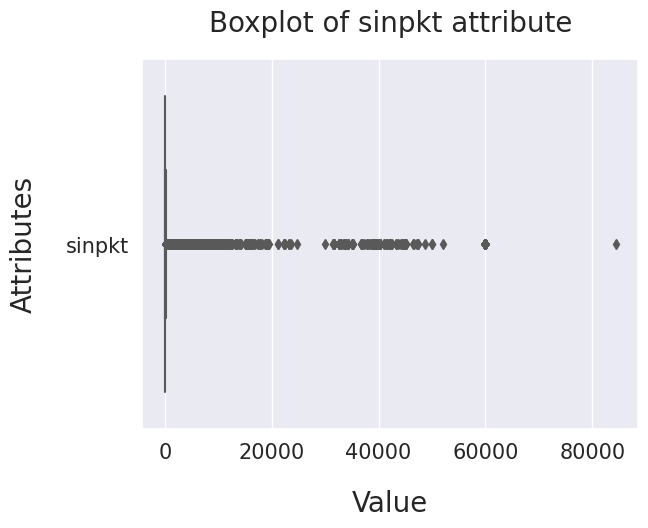

In [313]:
#create the boxplot for sinpkt
ax = sns.boxplot(data = df[["sinpkt"]], orient = "h", palette = "Set2")
#add labels
ax.set_xlabel("Value", fontsize = 20, labelpad = 20)
ax.set_ylabel("Attributes", fontsize = 20, labelpad = 20)
ax.set_title("Boxplot of sinpkt attribute", fontsize = 20,pad = 20)
#edit ticks
ax.tick_params(which = "both", labelsize = 15)

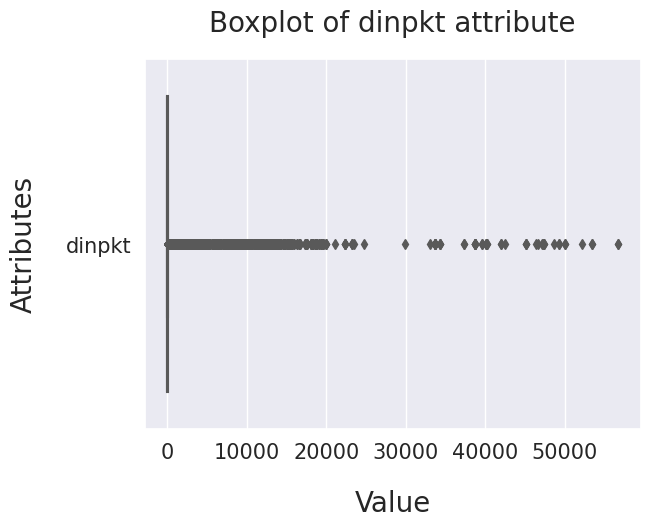

In [314]:
#create the boxplot for dinpkt
ax = sns.boxplot(data = df[["dinpkt"]], orient = "h", palette = "Set2")
#add labels
ax.set_xlabel("Value", fontsize = 20, labelpad = 20)
ax.set_ylabel("Attributes", fontsize = 20, labelpad = 20)
ax.set_title("Boxplot of dinpkt attribute", fontsize = 20,pad = 20)
#edit ticks
ax.tick_params(which = "both", labelsize = 15)

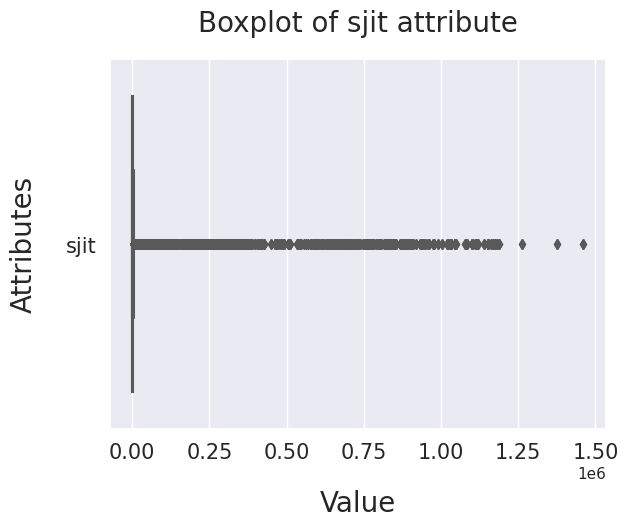

In [315]:
#create the boxplot for sjit
ax = sns.boxplot(data = df[["sjit"]], orient = "h", palette = "Set2")
#add labels
ax.set_xlabel("Value", fontsize = 20, labelpad = 20)
ax.set_ylabel("Attributes", fontsize = 20, labelpad = 20)
ax.set_title("Boxplot of sjit attribute", fontsize = 20,pad = 20)
#edit ticks
ax.tick_params(which = "both", labelsize = 15)

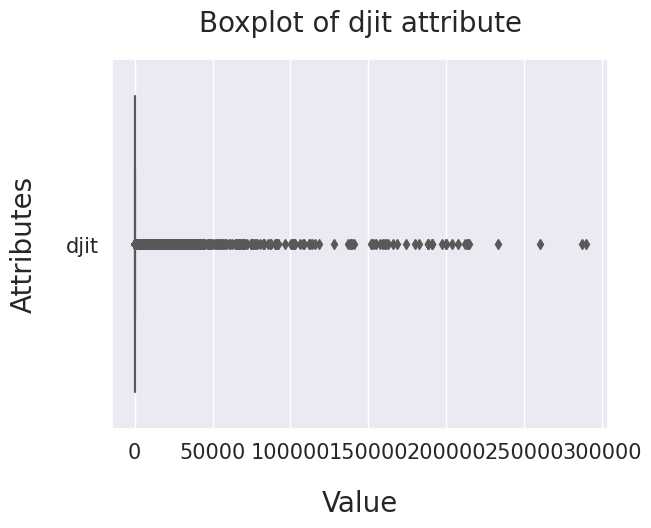

In [ ]:
#create the boxplot for djit
ax = sns.boxplot(data = df[["djit"]], orient = "h", palette = "Set2")
#add labels
ax.set_xlabel("Value", fontsize = 20, labelpad = 20)
ax.set_ylabel("Attributes", fontsize = 20, labelpad = 20)
ax.set_title("Boxplot of djit attribute", fontsize = 20,pad = 20)
#edit ticks
ax.tick_params(which = "both", labelsize = 15)

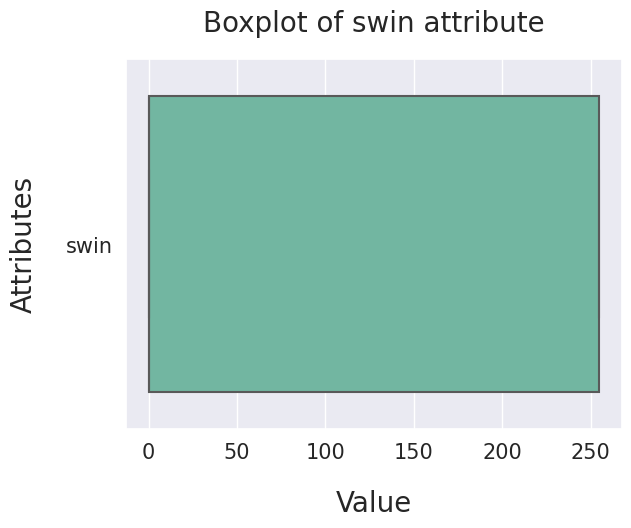

In [316]:
#create the boxplot for swin
ax = sns.boxplot(data = df[["swin"]], orient = "h", palette = "Set2")
#add labels
ax.set_xlabel("Value", fontsize = 20, labelpad = 20)
ax.set_ylabel("Attributes", fontsize = 20, labelpad = 20)
ax.set_title("Boxplot of swin attribute", fontsize = 20,pad = 20)
#edit ticks
ax.tick_params(which = "both", labelsize = 15)

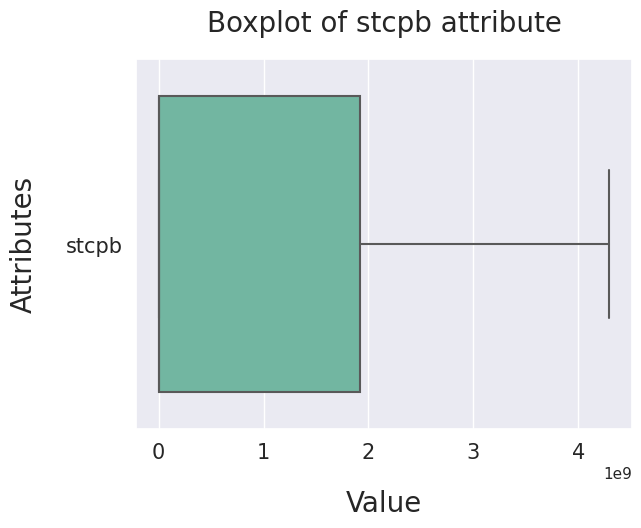

In [317]:
#create the boxplot for stcpb
ax = sns.boxplot(data = df[["stcpb"]], orient = "h", palette = "Set2")
#add labels
ax.set_xlabel("Value", fontsize = 20, labelpad = 20)
ax.set_ylabel("Attributes", fontsize = 20, labelpad = 20)
ax.set_title("Boxplot of stcpb attribute", fontsize = 20,pad = 20)
#edit ticks
ax.tick_params(which = "both", labelsize = 15)

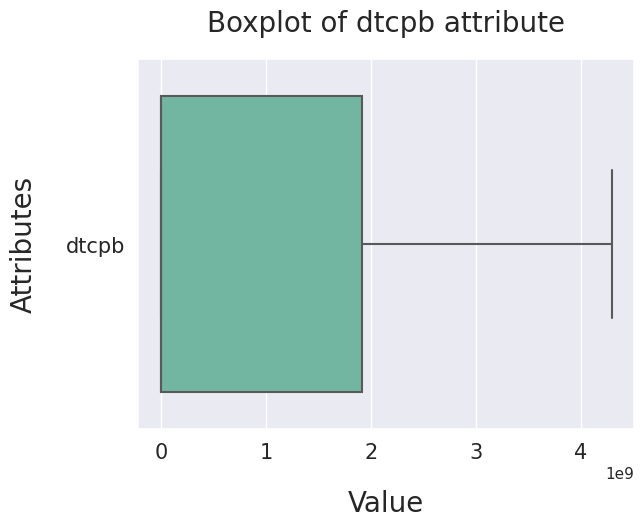

In [318]:
#create the boxplot for dtcpb
ax = sns.boxplot(data = df[["dtcpb"]], orient = "h", palette = "Set2")
#add labels
ax.set_xlabel("Value", fontsize = 20, labelpad = 20)
ax.set_ylabel("Attributes", fontsize = 20, labelpad = 20)
ax.set_title("Boxplot of dtcpb attribute", fontsize = 20,pad = 20)
#edit ticks
ax.tick_params(which = "both", labelsize = 15)

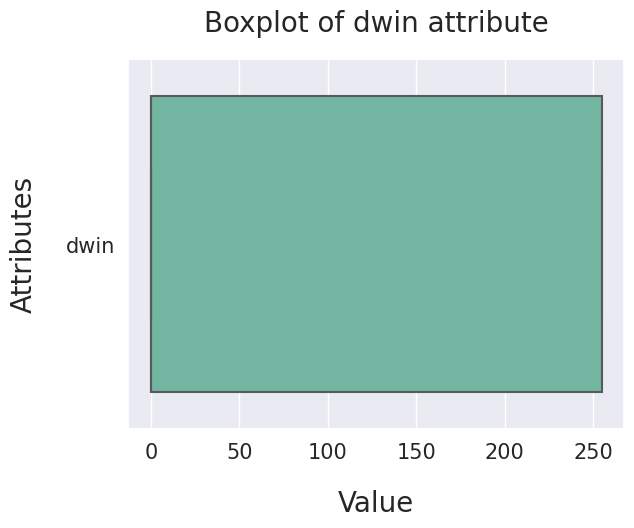

In [319]:
#create the boxplot for dwin
ax = sns.boxplot(data = df[["dwin"]], orient = "h", palette = "Set2")
#add labels
ax.set_xlabel("Value", fontsize = 20, labelpad = 20)
ax.set_ylabel("Attributes", fontsize = 20, labelpad = 20)
ax.set_title("Boxplot of dwin attribute", fontsize = 20,pad = 20)
#edit ticks
ax.tick_params(which = "both", labelsize = 15)

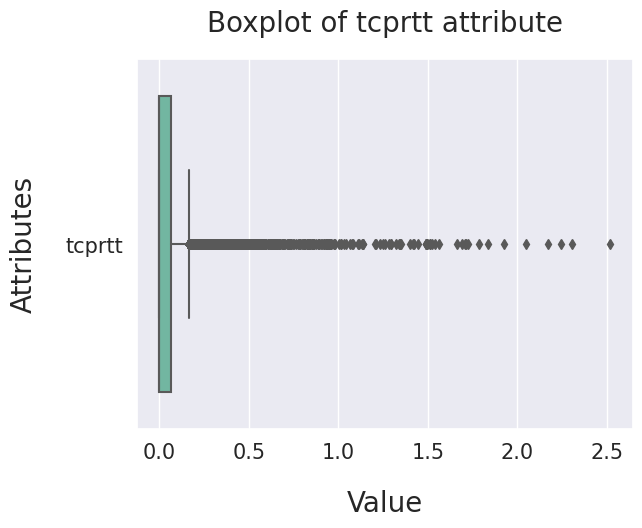

In [320]:
#create the boxplot for tcprtt
ax = sns.boxplot(data = df[["tcprtt"]], orient = "h", palette = "Set2")
#add labels
ax.set_xlabel("Value", fontsize = 20, labelpad = 20)
ax.set_ylabel("Attributes", fontsize = 20, labelpad = 20)
ax.set_title("Boxplot of tcprtt attribute", fontsize = 20,pad = 20)
#edit ticks
ax.tick_params(which = "both", labelsize = 15)

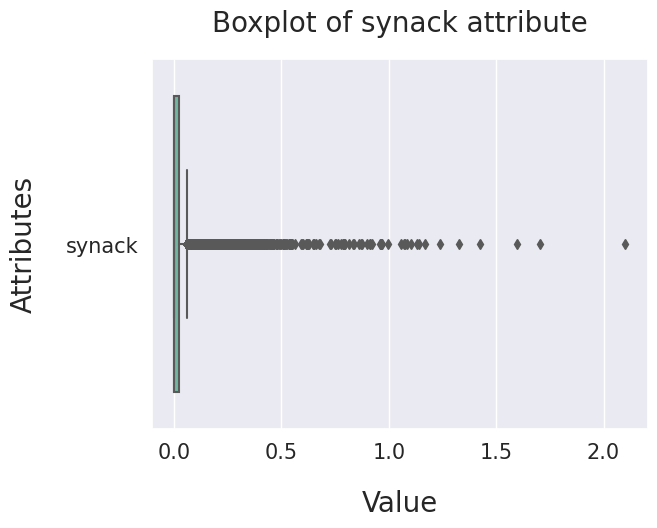

In [321]:
#create the boxplot for synack
ax = sns.boxplot(data = df[["synack"]], orient = "h", palette = "Set2")
#add labels
ax.set_xlabel("Value", fontsize = 20, labelpad = 20)
ax.set_ylabel("Attributes", fontsize = 20, labelpad = 20)
ax.set_title("Boxplot of synack attribute", fontsize = 20,pad = 20)
#edit ticks
ax.tick_params(which = "both", labelsize = 15)

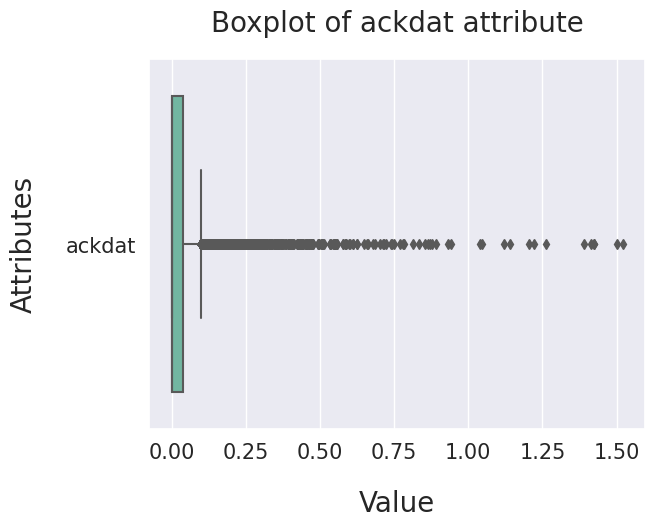

In [322]:
#create the boxplot for ackdat
ax = sns.boxplot(data = df[["ackdat"]], orient = "h", palette = "Set2")
#add labels
ax.set_xlabel("Value", fontsize = 20, labelpad = 20)
ax.set_ylabel("Attributes", fontsize = 20, labelpad = 20)
ax.set_title("Boxplot of ackdat attribute", fontsize = 20,pad = 20)
#edit ticks
ax.tick_params(which = "both", labelsize = 15)

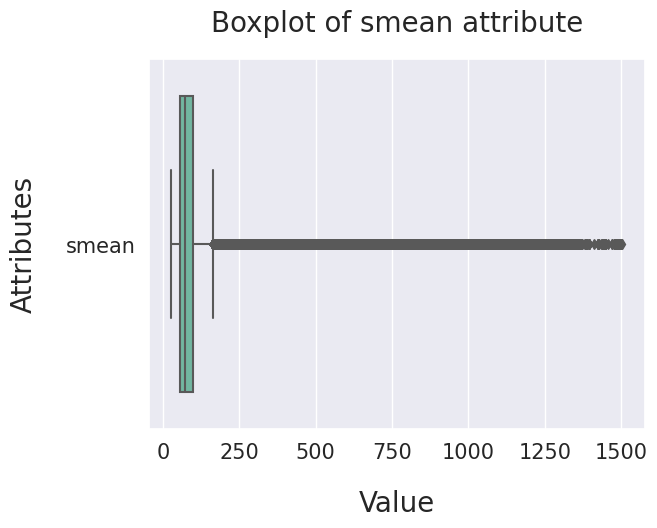

In [323]:
#create the boxplot for smean
ax = sns.boxplot(data = df[["smean"]], orient = "h", palette = "Set2")
#add labels
ax.set_xlabel("Value", fontsize = 20, labelpad = 20)
ax.set_ylabel("Attributes", fontsize = 20, labelpad = 20)
ax.set_title("Boxplot of smean attribute", fontsize = 20,pad = 20)
#edit ticks
ax.tick_params(which = "both", labelsize = 15)

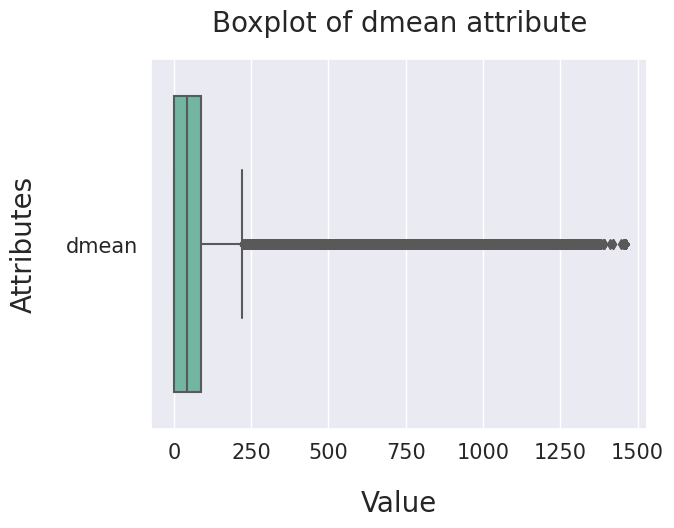

In [324]:
#create the boxplot for dmean
ax = sns.boxplot(data = df[["dmean"]], orient = "h", palette = "Set2")
#add labels
ax.set_xlabel("Value", fontsize = 20, labelpad = 20)
ax.set_ylabel("Attributes", fontsize = 20, labelpad = 20)
ax.set_title("Boxplot of dmean attribute", fontsize = 20,pad = 20)
#edit ticks
ax.tick_params(which = "both", labelsize = 15)

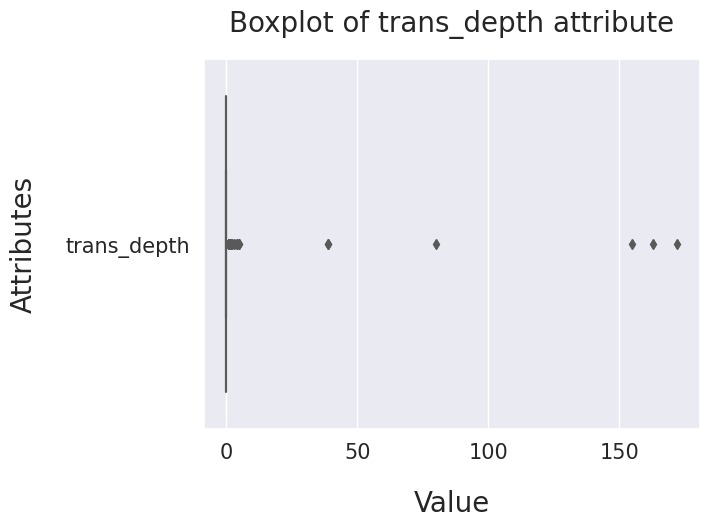

In [325]:
#create the boxplot for trans_depth
ax = sns.boxplot(data = df[["trans_depth"]], orient = "h", palette = "Set2")
#add labels
ax.set_xlabel("Value", fontsize = 20, labelpad = 20)
ax.set_ylabel("Attributes", fontsize = 20, labelpad = 20)
ax.set_title("Boxplot of trans_depth attribute", fontsize = 20,pad = 20)
#edit ticks
ax.tick_params(which = "both", labelsize = 15)

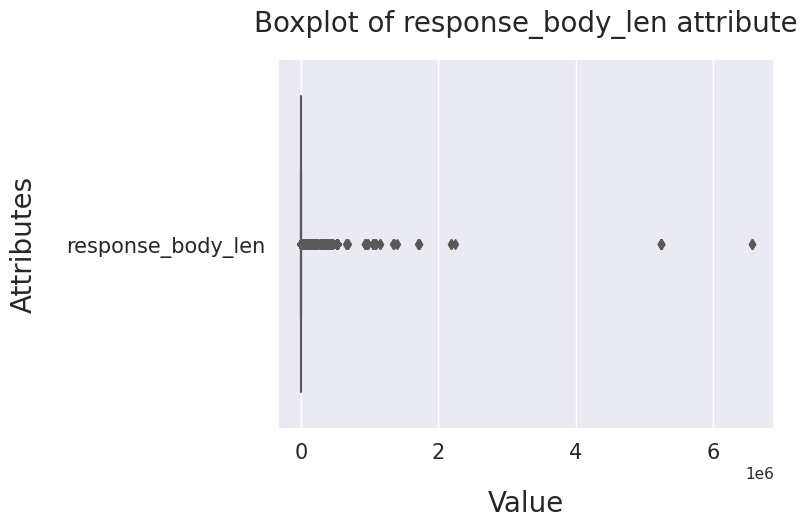

In [326]:
#create the boxplot for response_body_len
ax = sns.boxplot(data = df[["response_body_len"]], orient = "h", palette = "Set2")
#add labels
ax.set_xlabel("Value", fontsize = 20, labelpad = 20)
ax.set_ylabel("Attributes", fontsize = 20, labelpad = 20)
ax.set_title("Boxplot of response_body_len attribute", fontsize = 20,pad = 20)
#edit ticks
ax.tick_params(which = "both", labelsize = 15)

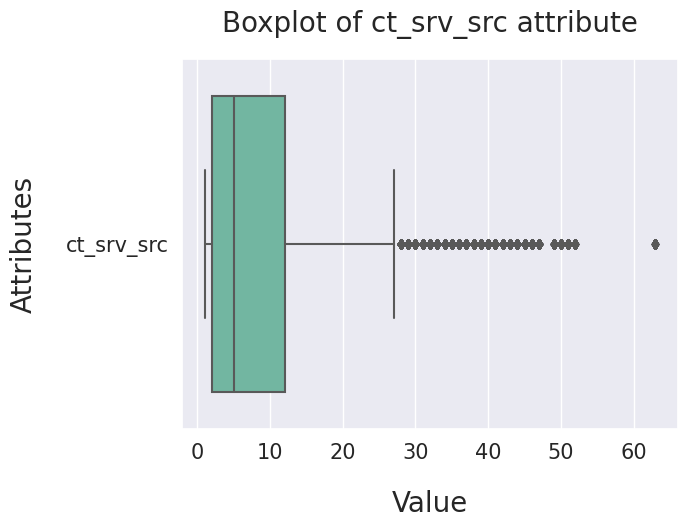

In [327]:
#create the boxplot for ct_srv_src
ax = sns.boxplot(data = df[["ct_srv_src"]], orient = "h", palette = "Set2")
#add labels
ax.set_xlabel("Value", fontsize = 20, labelpad = 20)
ax.set_ylabel("Attributes", fontsize = 20, labelpad = 20)
ax.set_title("Boxplot of ct_srv_src attribute", fontsize = 20,pad = 20)
#edit ticks
ax.tick_params(which = "both", labelsize = 15)

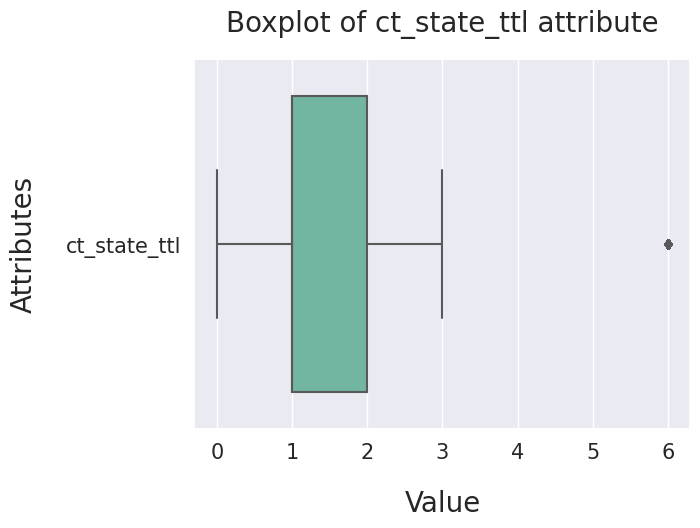

In [328]:
#create the boxplot for ct_state_ttl
ax = sns.boxplot(data = df[["ct_state_ttl"]], orient = "h", palette = "Set2")
#add labels
ax.set_xlabel("Value", fontsize = 20, labelpad = 20)
ax.set_ylabel("Attributes", fontsize = 20, labelpad = 20)
ax.set_title("Boxplot of ct_state_ttl attribute", fontsize = 20,pad = 20)
#edit ticks
ax.tick_params(which = "both", labelsize = 15)

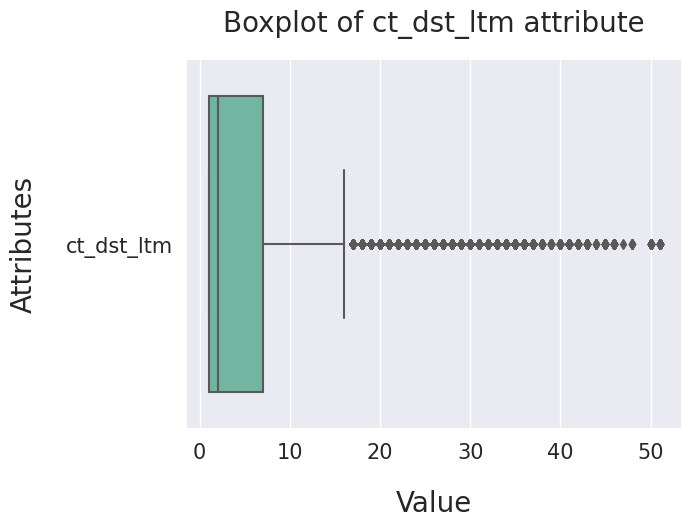

In [329]:
#create the boxplot for ct_dst_ltm
ax = sns.boxplot(data = df[["ct_dst_ltm"]], orient = "h", palette = "Set2")
#add labels
ax.set_xlabel("Value", fontsize = 20, labelpad = 20)
ax.set_ylabel("Attributes", fontsize = 20, labelpad = 20)
ax.set_title("Boxplot of ct_dst_ltm attribute", fontsize = 20,pad = 20)
#edit ticks
ax.tick_params(which = "both", labelsize = 15)

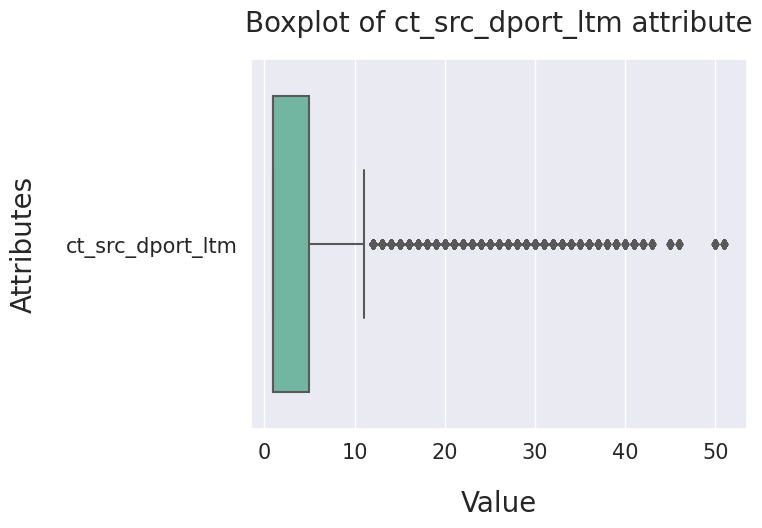

In [330]:
#create the boxplot for ct_src_dport_ltm
ax = sns.boxplot(data = df[["ct_src_dport_ltm"]], orient = "h", palette = "Set2")
#add labels
ax.set_xlabel("Value", fontsize = 20, labelpad = 20)
ax.set_ylabel("Attributes", fontsize = 20, labelpad = 20)
ax.set_title("Boxplot of ct_src_dport_ltm attribute", fontsize = 20,pad = 20)
#edit ticks
ax.tick_params(which = "both", labelsize = 15)

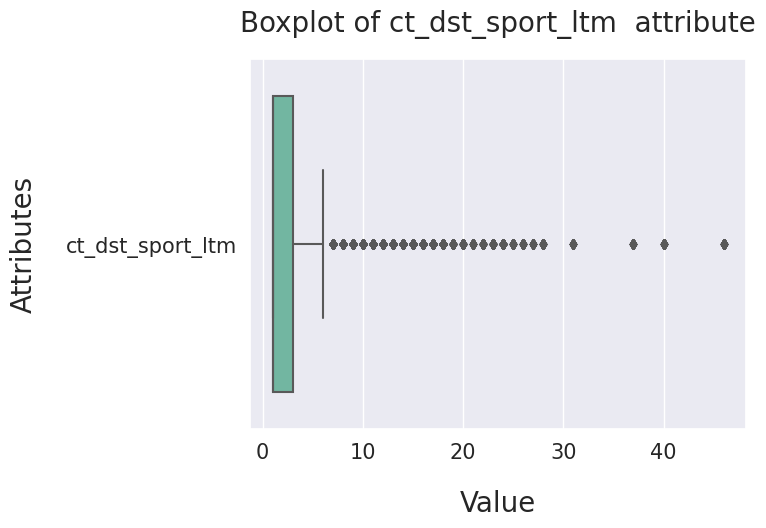

In [331]:
#create the boxplot for ct_dst_sport_ltm
ax = sns.boxplot(data = df[["ct_dst_sport_ltm"]], orient = "h", palette = "Set2")
#add labels
ax.set_xlabel("Value", fontsize = 20, labelpad = 20)
ax.set_ylabel("Attributes", fontsize = 20, labelpad = 20)
ax.set_title("Boxplot of ct_dst_sport_ltm  attribute", fontsize = 20,pad = 20)
#edit ticks
ax.tick_params(which = "both", labelsize = 15)

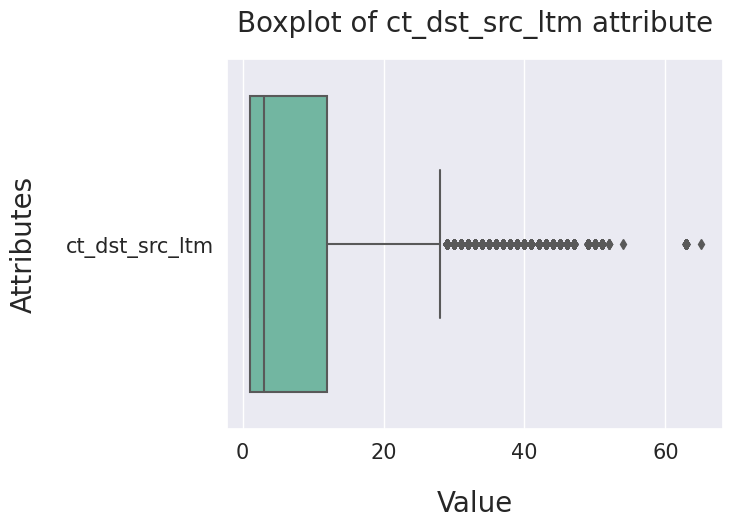

In [332]:
#create the boxplot for ct_dst_src_ltm
ax = sns.boxplot(data = df[["ct_dst_src_ltm"]], orient = "h", palette = "Set2")
#add labels
ax.set_xlabel("Value", fontsize = 20, labelpad = 20)
ax.set_ylabel("Attributes", fontsize = 20, labelpad = 20)
ax.set_title("Boxplot of ct_dst_src_ltm attribute", fontsize = 20,pad = 20)
#edit ticks
ax.tick_params(which = "both", labelsize = 15)

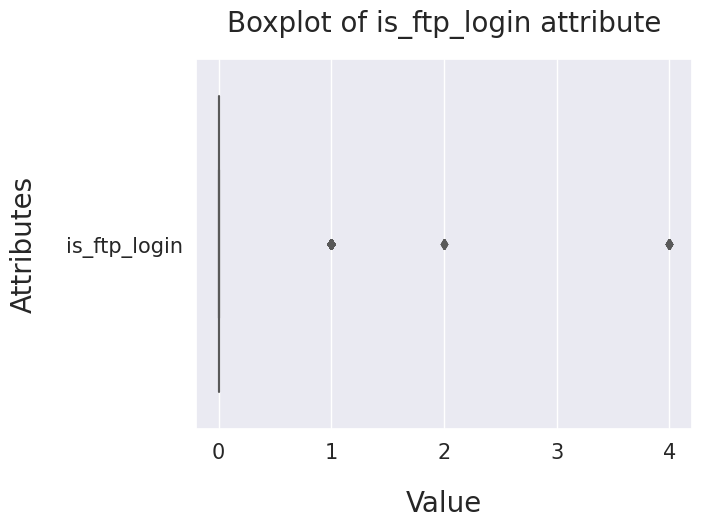

In [333]:
#create the boxplot for is_ftp_login
ax = sns.boxplot(data = df[["is_ftp_login"]], orient = "h", palette = "Set2")
#add labels
ax.set_xlabel("Value", fontsize = 20, labelpad = 20)
ax.set_ylabel("Attributes", fontsize = 20, labelpad = 20)
ax.set_title("Boxplot of is_ftp_login attribute", fontsize = 20,pad = 20)
#edit ticks
ax.tick_params(which = "both", labelsize = 15)

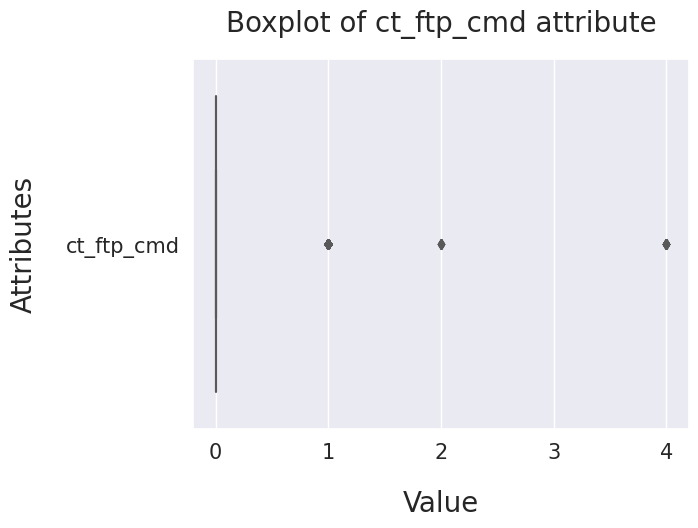

In [334]:
#create the boxplot for ct_ftp_cmd
ax = sns.boxplot(data = df[["ct_ftp_cmd"]], orient = "h", palette = "Set2")
#add labels
ax.set_xlabel("Value", fontsize = 20, labelpad = 20)
ax.set_ylabel("Attributes", fontsize = 20, labelpad = 20)
ax.set_title("Boxplot of ct_ftp_cmd attribute", fontsize = 20,pad = 20)
#edit ticks
ax.tick_params(which = "both", labelsize = 15)

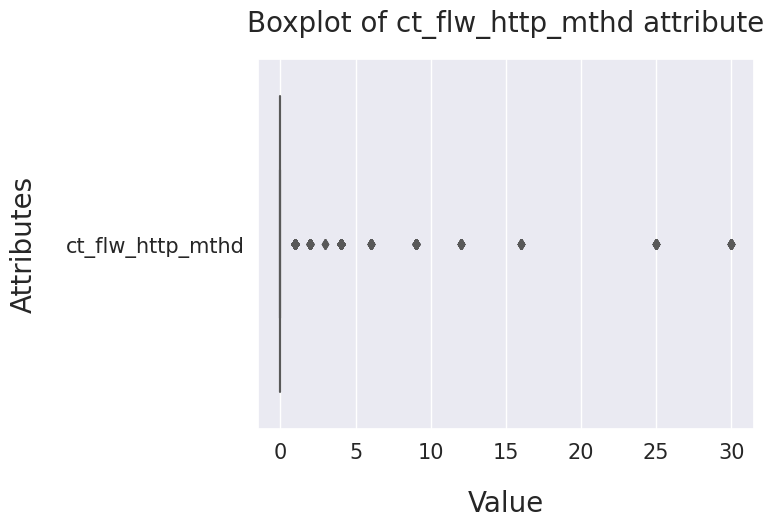

In [335]:
#create the boxplot for ct_flw_http_mthd
ax = sns.boxplot(data = df[["ct_flw_http_mthd"]], orient = "h", palette = "Set2")
#add labels
ax.set_xlabel("Value", fontsize = 20, labelpad = 20)
ax.set_ylabel("Attributes", fontsize = 20, labelpad = 20)
ax.set_title("Boxplot of ct_flw_http_mthd attribute", fontsize = 20,pad = 20)
#edit ticks
ax.tick_params(which = "both", labelsize = 15)

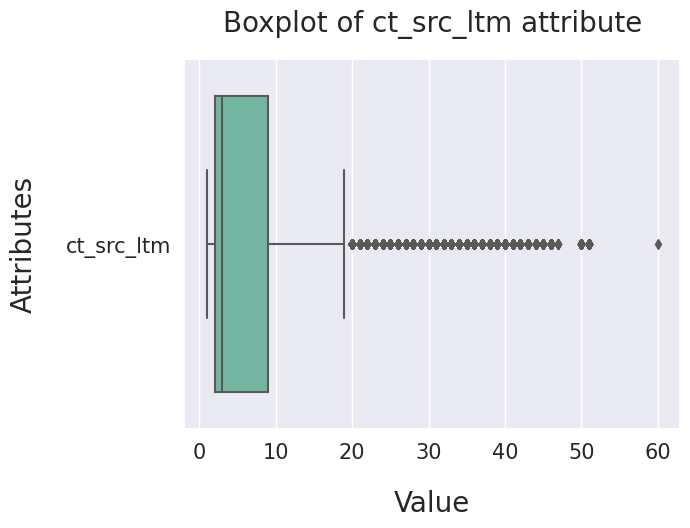

In [336]:
#create the boxplot for ct_src_ltm
ax = sns.boxplot(data = df[["ct_src_ltm"]], orient = "h", palette = "Set2")
#add labels
ax.set_xlabel("Value", fontsize = 20, labelpad = 20)
ax.set_ylabel("Attributes", fontsize = 20, labelpad = 20)
ax.set_title("Boxplot of ct_src_ltm attribute", fontsize = 20,pad = 20)
#edit ticks
ax.tick_params(which = "both", labelsize = 15)

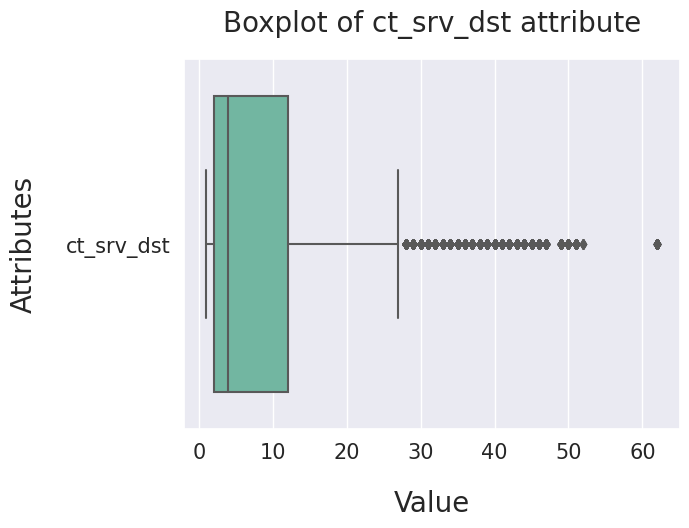

In [337]:
#create the boxplot for ct_srv_dst
ax = sns.boxplot(data = df[["ct_srv_dst"]], orient = "h", palette = "Set2")
#add labels
ax.set_xlabel("Value", fontsize = 20, labelpad = 20)
ax.set_ylabel("Attributes", fontsize = 20, labelpad = 20)
ax.set_title("Boxplot of ct_srv_dst attribute", fontsize = 20,pad = 20)
#edit ticks
ax.tick_params(which = "both", labelsize = 15)

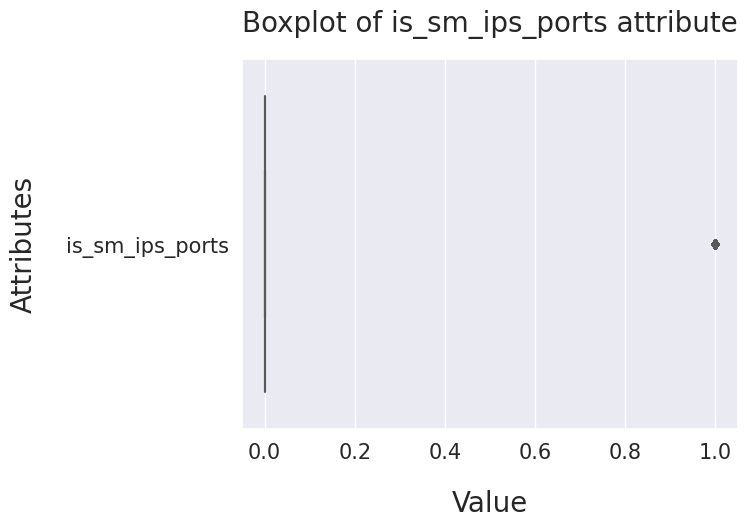

In [338]:
#create the boxplot for is_sm_ips_ports
ax = sns.boxplot(data = df[["is_sm_ips_ports"]], orient = "h", palette = "Set2")
#add labels
ax.set_xlabel("Value", fontsize = 20, labelpad = 20)
ax.set_ylabel("Attributes", fontsize = 20, labelpad = 20)
ax.set_title("Boxplot of is_sm_ips_ports attribute", fontsize = 20,pad = 20)
#edit ticks
ax.tick_params(which = "both", labelsize = 15)

As you can see from the box plots there are outliers in following features:-

'dur', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'sload', 'dload', 'sloss', 'dloss', 'sinpkt', 'dinpkt', 'sjit', 'djit', 'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth', 'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm', 'ct_srv_dst', 'is_sm_ips_ports'.
  

Lets now remove the outliers

In [340]:
df = df_bkup1.copy() # take the original dataset

In [341]:
# define a function called 'outliers' that returns a list of index of outliers
def outliers(data, ft):
  Q1 = data[ft].quantile(0.25)
  Q3 = data[ft].quantile(0.75)

  IQR = Q3 - Q1

  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  ls = data.index[(data[ft]< lower_bound)| (data[ft] > upper_bound)]

  return ls

In [342]:
# create empty list to store the output indices from multiple columns
index_list = []

for feature in ['dur', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'sload', 'dload', 'sloss', 'dloss', 'sinpkt', 'dinpkt', 'sjit', 'djit', 'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth', 'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm', 'ct_srv_dst', 'is_sm_ips_ports']:
  index_list.extend(outliers(df, feature))

In [343]:
print(index_list)
len(index_list) # this may include duplicate indices

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



607646

In [344]:
# define a function called 'remove' which returns a cleaned dataframe without outliers
def remove (data, ls):
  ls =  sorted(set(ls)) # set to remove duplicates
  df = data.drop(ls)
  return df

In [345]:
df_cleaned = remove(df, index_list)

In [346]:
df_cleaned.shape

(32611, 44)

In [347]:
df.shape

(175341, 44)

In [348]:
df = df_cleaned

In [349]:
df.head()

id       dur proto service state  spkts  dpkts  sbytes  dbytes  \
0    1  0.121478   tcp       -   FIN      6      4     258     172   
33  34  0.000025   udp       -   INT      2      0     168       0   
36  37  0.000015   udp       -   INT      2      0     168       0   
38  39  0.354553   tcp       -   FIN     10      6    1016     268   
42  43  0.000008   udp       -   INT      2      0     168       0   

            rate  ...  ct_src_dport_ltm  ct_dst_sport_ltm  ct_dst_src_ltm  \
0       74.08749  ...                 1                 1               1   
33   40000.00101  ...                 1                 1               2   
36   66666.66835  ...                 1                 1               3   
38      42.30679  ...                 1                 1               2   
42  125000.00030  ...                 1                 1               1   

    is_ftp_login  ct_ftp_cmd  ct_flw_http_mthd  ct_src_ltm  ct_srv_dst  \
0              0           0                 0           1           1   
33             0           0                 0           1           5   
36             0           0                 0           1           3   
38             0           0                 0           1           5   
42             0           0                 0           1           2   

    is_sm_ips_ports  attack_cat  
0                 0      Normal  
33                0      Normal  
36                0      Normal  
38                0      Normal  
42                0      Normal  

[5 rows x 44 columns]

<font color="orange">Observations & Justifications:</font>
<font color="darkcyan"> As you can see outliers have been removed and now the number of samples in dataset is reduced to 32611 from 175341. Number of columns remain the same, i.e. 44.</font>

In [ ]:
df_bkup2 = df.copy() #take a backup of dataset after outlier removal

### b. Remove non-Important Features

Since 'id' is not important in building the model we will remove it.

In [350]:
df=df.drop(['id'], axis=1)

In [351]:
zero_value_columns = ['dur', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss', 'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin', 'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth', 'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm', 'ct_srv_dst', 'is_sm_ips_ports']
z_list =[]

for columns in zero_value_columns:
  if len(df[columns].unique()) == 1:
      z_list.append(columns)


In [352]:
print(z_list)

['trans_depth', 'response_body_len', 'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'is_sm_ips_ports']


Since 'trans_depth', 'response_body_len', 'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'is_sm_ips_ports' have only zeros, we can eliminate these features as it will not help in any prediction.  

In [353]:
df=df.drop(['trans_depth', 'response_body_len', 'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'is_sm_ips_ports'], axis=1)


In [354]:
df.shape

(32611, 37)

In [356]:
df_bkup3 = df.copy() #take a backup of dataset after removal of unimportant features

<font color="orange">Observations & Justifications:</font>
<font color="darkcyan"> As you can see Number of columns are reduced to 37 after dropping 'id', 'trans_depth', 'response_body_len', 'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'is_sm_ips_ports' columns.</font>

### c. Split training and testing data set

In [357]:
#Split training and test dataset
# arrays for features/attributes and target/class
X= df.drop('attack_cat', axis=1).values
y = df['attack_cat'].values

In [358]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4,random_state=42, stratify=y)

<font color="orange">Observations & Justifications:</font>
<font color="darkcyan"> The dataset is now split into Train and Test.</font>

### d. Standardize/Normalize the Variables whenever required.

In [359]:
df.head()

dur proto service state  spkts  dpkts  sbytes  dbytes          rate  \
0   0.121478   tcp       -   FIN      6      4     258     172      74.08749   
33  0.000025   udp       -   INT      2      0     168       0   40000.00101   
36  0.000015   udp       -   INT      2      0     168       0   66666.66835   
38  0.354553   tcp       -   FIN     10      6    1016     268      42.30679   
42  0.000008   udp       -   INT      2      0     168       0  125000.00030   

    sttl  ...  dmean  ct_srv_src  ct_state_ttl  ct_dst_ltm  ct_src_dport_ltm  \
0    252  ...     43           1             0           1                 1   
33   254  ...      0          11             2           1                 1   
36   254  ...      0           7             2           1                 1   
38   254  ...     45          11             1           1                 1   
42   254  ...      0           7             2           1                 1   

    ct_dst_sport_ltm  ct_dst_src_ltm  ct_src_ltm  ct_srv_dst  attack_cat  
0                  1               1           1           1      Normal  
33                 1               2           1           5      Normal  
36                 1               3           1           3      Normal  
38                 1               2           1           5      Normal  
42                 1               1           1           2      Normal  

[5 rows x 37 columns]

In [360]:
df['attack_cat'].unique()

array(['Normal', 'Backdoor', 'Analysis', 'Fuzzers', 'Shellcode',
       'Reconnaissance', 'DoS', 'Exploits', 'Worms', 'Generic'],
      dtype=object)

In [361]:
df['proto'].unique()

array(['tcp', 'udp', 'icmp', 'arp', 'igmp', 'ddp', 'ipv6-frag', 'cftp',
       'pvp', 'wb-expak', 'mtp', 'pri-enc', 'sat-mon', 'sun-nd', 'xtp',
       'il', 'unas', '3pc', 'ipv6-route', 'swipe', 'kryptolan', 'cpnx',
       'rsvp', 'wb-mon', 'vmtp', 'ib', 'ax.25', 'pnni', 'pgm', 'zero',
       'mobile', 'narp', 'fc', 'pipe', 'ipcomp', 'ipv6-no', 'sat-expak',
       'ipv6-opts', 'br-sat-mon', 'ttp', 'ospf', 'sprite-rpc',
       'aes-sp3-d', 'sccopmce', 'sctp', 'aris', 'compaq-peer', 'vrrp',
       'iatp', 'l2tp', 'srp', 'sm', 'isis', 'smp', 'sps', 'merit-inp',
       'skip', 'any', 'larp', 'ipip', 'encap', 'ifmp', 'tp++', 'i-nlsp',
       'ipx-n-ip', 'sdrp', 'tlsp', 'mhrp', 'ddx', 'secure-vmtp', 'uti',
       'vines', 'iplt', 'ipv6', 'gre', 'pim', 'snp', 'crudp', 'ip',
       'ipnip', 'chaos', 'dcn', 'hmp', 'prm', 'trunk-1', 'xns-idp',
       'leaf-1', 'leaf-2', 'rdp', 'irtp', 'iso-tp4', 'netblt', 'mfe-nsp',
       'sep', 'idpr-cmtp', 'idrp', 'ippc', 'visa', 'ipcv', 'cphb', 'wsn',
      

In [362]:
df['service'].unique()

array(['-', 'dns', 'ftp', 'http', 'ftp-data', 'smtp', 'snmp', 'irc',
       'radius', 'ssl', 'dhcp'], dtype=object)

In [363]:
df['state'].unique()

array(['FIN', 'INT', 'ECO', 'CON', 'RST', 'URN', 'no'], dtype=object)

To normalize the variables we need to convert categorical features to numerical.

In [364]:
# convert 'proto' column values to numerical using Label Encoding
le = LabelEncoder()
label = le.fit_transform(df['proto'])
df.drop("proto", axis=1, inplace=True)
df["proto"] = label
df.head()

dur service state  spkts  dpkts  sbytes  dbytes          rate  sttl  \
0   0.121478       -   FIN      6      4     258     172      74.08749   252   
33  0.000025       -   INT      2      0     168       0   40000.00101   254   
36  0.000015       -   INT      2      0     168       0   66666.66835   254   
38  0.354553       -   FIN     10      6    1016     268      42.30679   254   
42  0.000008       -   INT      2      0     168       0  125000.00030   254   

    dttl  ...  ct_srv_src  ct_state_ttl  ct_dst_ltm  ct_src_dport_ltm  \
0    254  ...           1             0           1                 1   
33     0  ...          11             2           1                 1   
36     0  ...           7             2           1                 1   
38   252  ...          11             1           1                 1   
42     0  ...           7             2           1                 1   

    ct_dst_sport_ltm  ct_dst_src_ltm  ct_src_ltm  ct_srv_dst  attack_cat  \
0                  1               1           1           1      Normal   
33                 1               2           1           5      Normal   
36                 1               3           1           3      Normal   
38                 1               2           1           5      Normal   
42                 1               1           1           2      Normal   

    proto  
0     102  
33    108  
36    108  
38    102  
42    108  

[5 rows x 37 columns]

In [365]:
# convert 'service' column values to numerical using Label Encoding
le = LabelEncoder()
label = le.fit_transform(df['service'])
df.drop("service", axis=1, inplace=True)
df["service"] = label
df.head()

dur state  spkts  dpkts  sbytes  dbytes          rate  sttl  dttl  \
0   0.121478   FIN      6      4     258     172      74.08749   252   254   
33  0.000025   INT      2      0     168       0   40000.00101   254     0   
36  0.000015   INT      2      0     168       0   66666.66835   254     0   
38  0.354553   FIN     10      6    1016     268      42.30679   254   252   
42  0.000008   INT      2      0     168       0  125000.00030   254     0   

           sload  ...  ct_state_ttl  ct_dst_ltm  ct_src_dport_ltm  \
0   1.415894e+04  ...             0           1                 1   
33  2.688000e+07  ...             2           1                 1   
36  4.480000e+07  ...             2           1                 1   
38  2.064571e+04  ...             1           1                 1   
42  8.400000e+07  ...             2           1                 1   

    ct_dst_sport_ltm  ct_dst_src_ltm  ct_src_ltm  ct_srv_dst  attack_cat  \
0                  1               1           1           1      Normal   
33                 1               2           1           5      Normal   
36                 1               3           1           3      Normal   
38                 1               2           1           5      Normal   
42                 1               1           1           2      Normal   

    proto  service  
0     102        0  
33    108        0  
36    108        0  
38    102        0  
42    108        0  

[5 rows x 37 columns]

In [366]:
# convert 'state' column values to numerical using Label Encoding
le = LabelEncoder()
label = le.fit_transform(df['state'])
df.drop("state", axis=1, inplace=True)
df["state"] = label
df.head()

dur  spkts  dpkts  sbytes  dbytes          rate  sttl  dttl  \
0   0.121478      6      4     258     172      74.08749   252   254   
33  0.000025      2      0     168       0   40000.00101   254     0   
36  0.000015      2      0     168       0   66666.66835   254     0   
38  0.354553     10      6    1016     268      42.30679   254   252   
42  0.000008      2      0     168       0  125000.00030   254     0   

           sload        dload  ...  ct_dst_ltm  ct_src_dport_ltm  \
0   1.415894e+04  8495.365234  ...           1                 1   
33  2.688000e+07     0.000000  ...           1                 1   
36  4.480000e+07     0.000000  ...           1                 1   
38  2.064571e+04  5054.250977  ...           1                 1   
42  8.400000e+07     0.000000  ...           1                 1   

    ct_dst_sport_ltm  ct_dst_src_ltm  ct_src_ltm  ct_srv_dst  attack_cat  \
0                  1               1           1           1      Normal   
33                 1               2           1           5      Normal   
36                 1               3           1           3      Normal   
38                 1               2           1           5      Normal   
42                 1               1           1           2      Normal   

    proto  service  state  
0     102        0      2  
33    108        0      3  
36    108        0      3  
38    102        0      2  
42    108        0      3  

[5 rows x 37 columns]

In [367]:
df_bkup4 = df.copy() #take a backup of dataset after converting categorical features to numeric (except target, i.e. 'attack_cat')

In [369]:
df.head()

dur  spkts  dpkts  sbytes  dbytes          rate  sttl  dttl  \
0   0.121478      6      4     258     172      74.08749   252   254   
33  0.000025      2      0     168       0   40000.00101   254     0   
36  0.000015      2      0     168       0   66666.66835   254     0   
38  0.354553     10      6    1016     268      42.30679   254   252   
42  0.000008      2      0     168       0  125000.00030   254     0   

           sload        dload  ...  ct_dst_ltm  ct_src_dport_ltm  \
0   1.415894e+04  8495.365234  ...           1                 1   
33  2.688000e+07     0.000000  ...           1                 1   
36  4.480000e+07     0.000000  ...           1                 1   
38  2.064571e+04  5054.250977  ...           1                 1   
42  8.400000e+07     0.000000  ...           1                 1   

    ct_dst_sport_ltm  ct_dst_src_ltm  ct_src_ltm  ct_srv_dst  attack_cat  \
0                  1               1           1           1      Normal   
33                 1               2           1           5      Normal   
36                 1               3           1           3      Normal   
38                 1               2           1           5      Normal   
42                 1               1           1           2      Normal   

    proto  service  state  
0     102        0      2  
33    108        0      3  
36    108        0      3  
38    102        0      2  
42    108        0      3  

[5 rows x 37 columns]

<ipython-input-370-f1651fb8af45>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')


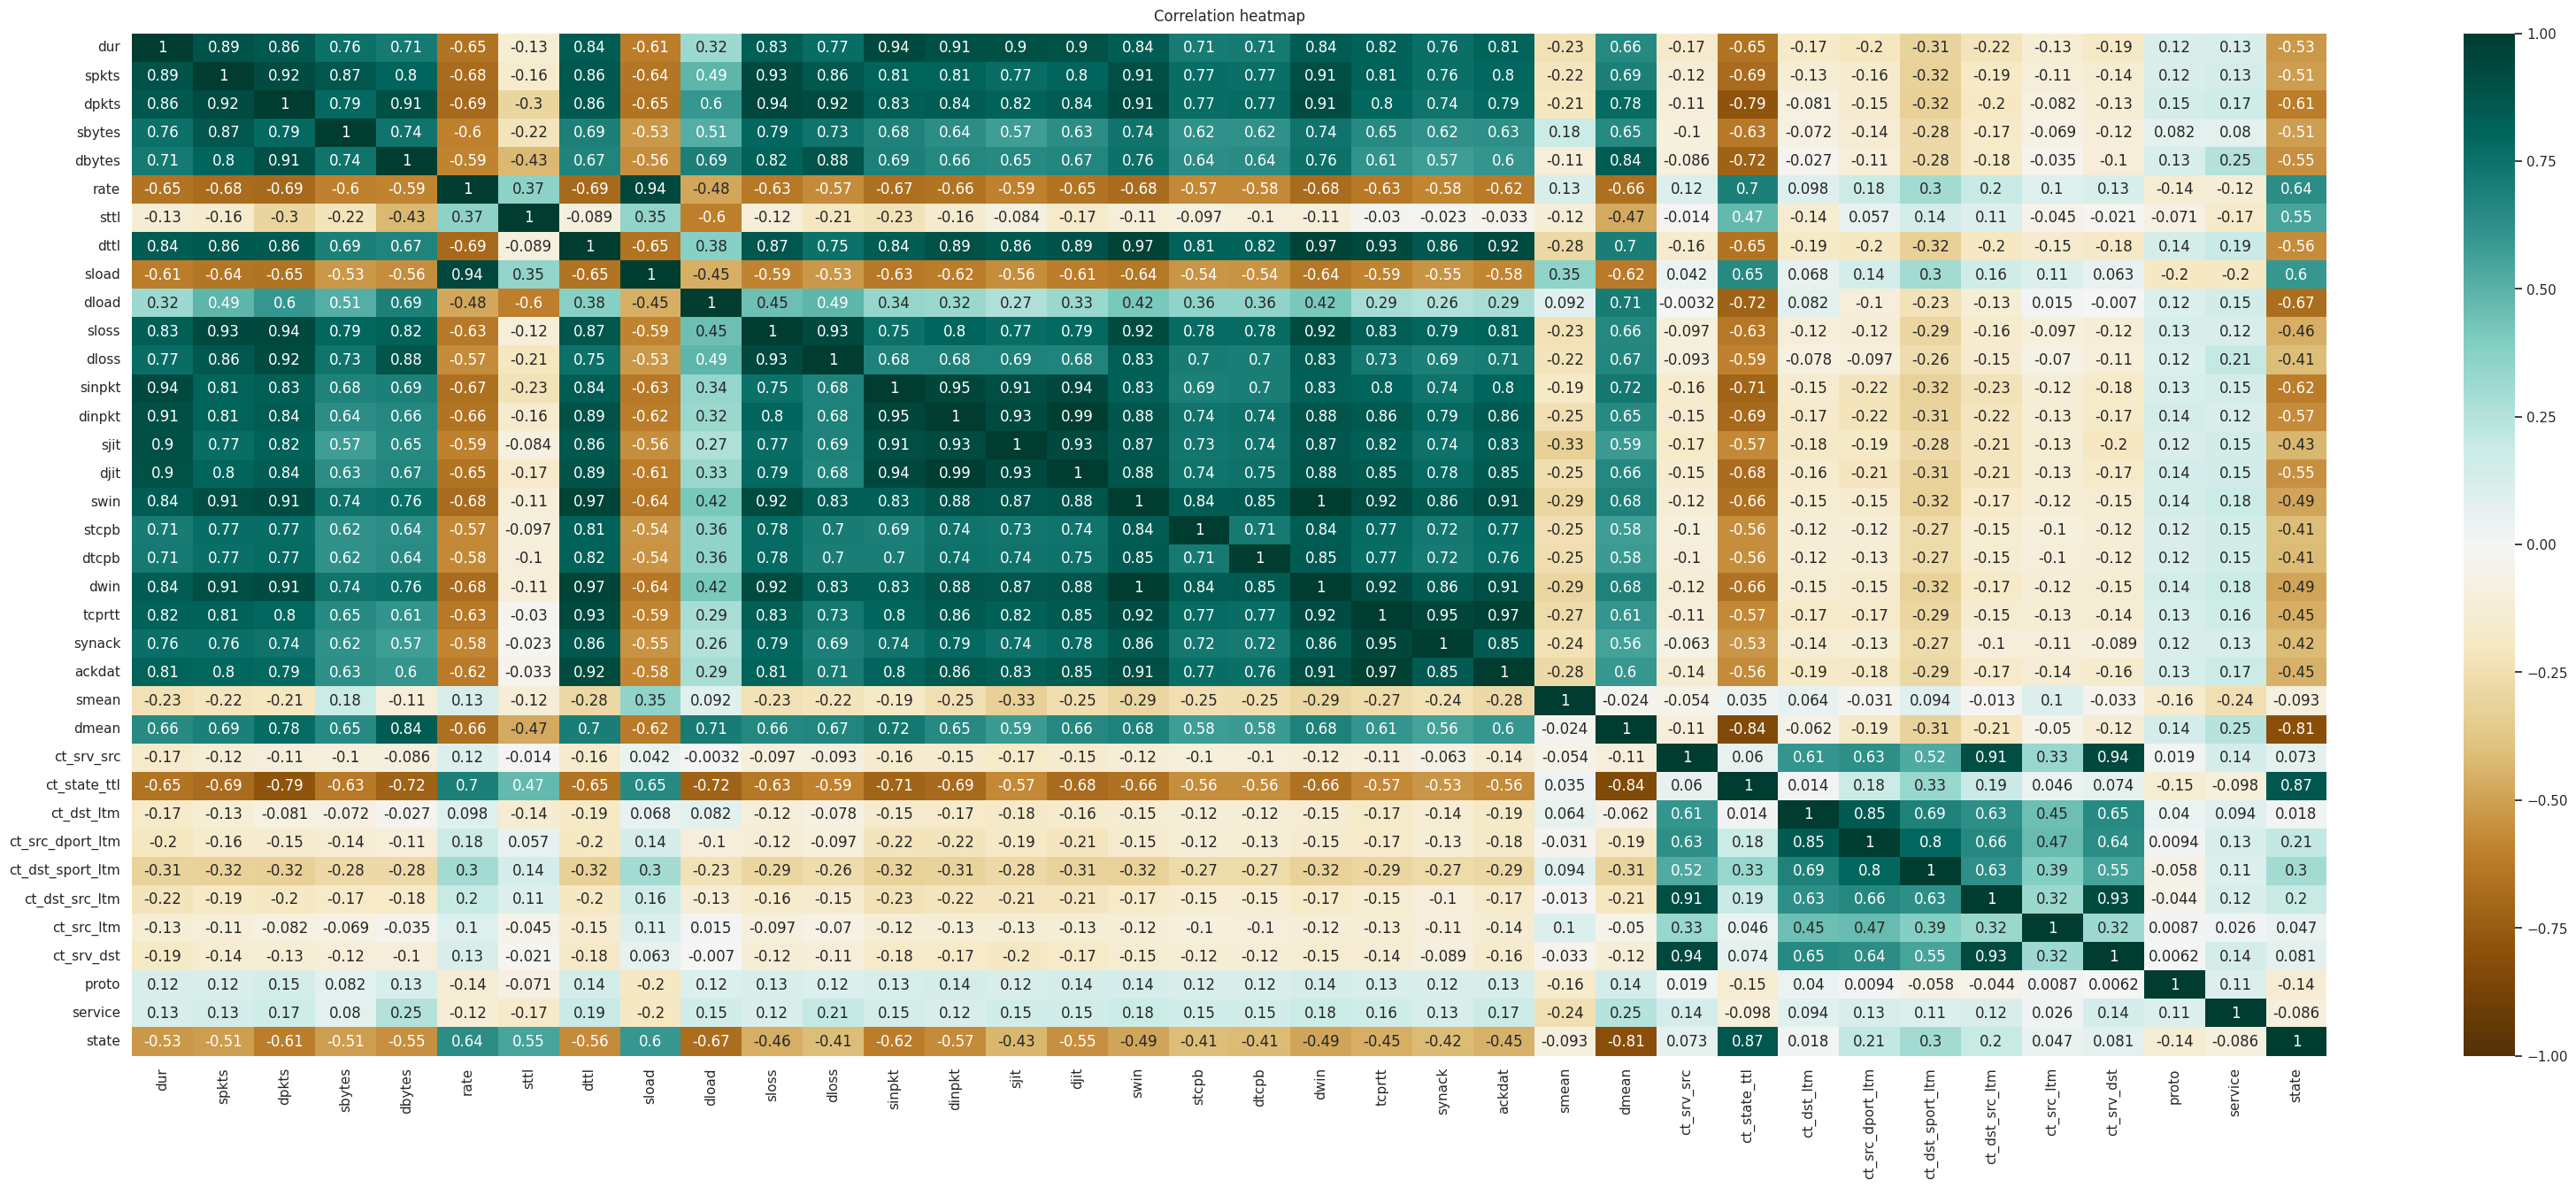

In [370]:
plt.figure(figsize=(40,15))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation heatmap', fontdict={'fontsize': 12}, pad=10)
plt.show()

In [371]:
# MinMax normalize all numeric columns
cols = df.select_dtypes(np.number).columns
df[cols] = minmax_scale(df[cols])
df.head()

dur     spkts     dpkts    sbytes    dbytes      rate      sttl  \
0   0.073388  0.238095  0.222222  0.081272  0.065549  0.000296  0.988235   
33  0.000015  0.047619  0.000000  0.049470  0.000000  0.160000  0.996078   
36  0.000009  0.047619  0.000000  0.049470  0.000000  0.266667  0.996078   
38  0.214196  0.428571  0.333333  0.349117  0.102134  0.000169  0.996078   
42  0.000005  0.047619  0.000000  0.049470  0.000000  0.500000  0.996078   

        dttl     sload     dload  ...  ct_dst_ltm  ct_src_dport_ltm  \
0   1.000000  0.000064  0.122308  ...         0.0               0.0   
33  0.000000  0.121081  0.000000  ...         0.0               0.0   
36  0.000000  0.201802  0.000000  ...         0.0               0.0   
38  0.992126  0.000093  0.072766  ...         0.0               0.0   
42  0.000000  0.378378  0.000000  ...         0.0               0.0   

    ct_dst_sport_ltm  ct_dst_src_ltm  ct_src_ltm  ct_srv_dst  attack_cat  \
0                0.0        0.000000         0.0    0.000000      Normal   
33               0.0        0.037037         0.0    0.153846      Normal   
36               0.0        0.074074         0.0    0.076923      Normal   
38               0.0        0.037037         0.0    0.153846      Normal   
42               0.0        0.000000         0.0    0.038462      Normal   

       proto  service     state  
0   0.842975      0.0  0.333333  
33  0.892562      0.0  0.500000  
36  0.892562      0.0  0.500000  
38  0.842975      0.0  0.333333  
42  0.892562      0.0  0.500000  

[5 rows x 37 columns]

In [372]:
df_bkup5 = df.copy() #take a backup of dataset after normalization

In [373]:
Zero_not_acepted = [ 'dur', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss', 'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin', 'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm',  'ct_src_ltm', 'ct_srv_dst']

for column in Zero_not_acepted:
    df[column] = df[column].replace(0.0,np.NaN)
    mean = float(df[column].mean(skipna=True))
    df[column]=df[column].replace(np.NaN, mean)

In [374]:
df.head()

dur     spkts     dpkts    sbytes    dbytes      rate      sttl  \
0   0.073388  0.238095  0.222222  0.081272  0.065549  0.000296  0.988235   
33  0.000015  0.047619  0.409596  0.049470  0.182044  0.160000  0.996078   
36  0.000009  0.047619  0.409596  0.049470  0.182044  0.266667  0.996078   
38  0.214196  0.428571  0.333333  0.349117  0.102134  0.000169  0.996078   
42  0.000005  0.047619  0.409596  0.049470  0.182044  0.500000  0.996078   

        dttl     sload     dload  ...  ct_dst_ltm  ct_src_dport_ltm  \
0   1.000000  0.000064  0.122308  ...    0.149523           0.19868   
33  0.807556  0.121081  0.149487  ...    0.149523           0.19868   
36  0.807556  0.201802  0.149487  ...    0.149523           0.19868   
38  0.992126  0.000093  0.072766  ...    0.149523           0.19868   
42  0.807556  0.378378  0.149487  ...    0.149523           0.19868   

    ct_dst_sport_ltm  ct_dst_src_ltm  ct_src_ltm  ct_srv_dst  attack_cat  \
0           0.373642        0.208427    0.167273    0.203765      Normal   
33          0.373642        0.037037    0.167273    0.153846      Normal   
36          0.373642        0.074074    0.167273    0.076923      Normal   
38          0.373642        0.037037    0.167273    0.153846      Normal   
42          0.373642        0.208427    0.167273    0.038462      Normal   

       proto  service     state  
0   0.842975      0.0  0.333333  
33  0.892562      0.0  0.500000  
36  0.892562      0.0  0.500000  
38  0.842975      0.0  0.333333  
42  0.892562      0.0  0.500000  

[5 rows x 37 columns]

In [375]:
df_bkup6 = df.copy() # take a backup of dataset after zero values are replaced by their mean values.

In [376]:
df.shape

(32611, 37)

**Types of Naive Bayes Classifier:**

Multinomial Naive Bayes:
This is mostly used for document classification problem, i.e whether a document belongs to the category of sports, politics, technology etc. The features/predictors used by the classifier are the frequency of the words present in the document.

Bernoulli Naive Bayes:
This is similar to the multinomial naive bayes but the predictors are boolean variables. The parameters that we use to predict the class variable take up only values yes or no, for example if a word occurs in the text or not.

Gaussian Naive Bayes:
When the predictors take up a continuous value and are not discrete, we assume that these values are sampled from a gaussian distribution.
Alternatively, a continuous feature could be discretized by binning its values, but doing so throws away information, and results could be sensitive to the binning scheme.

In [379]:
df = df_bkup6.copy()

In [380]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32611 entries, 0 to 175338
Data columns (total 37 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   dur               32611 non-null  float64
 1   spkts             32611 non-null  float64
 2   dpkts             32611 non-null  float64
 3   sbytes            32611 non-null  float64
 4   dbytes            32611 non-null  float64
 5   rate              32611 non-null  float64
 6   sttl              32611 non-null  float64
 7   dttl              32611 non-null  float64
 8   sload             32611 non-null  float64
 9   dload             32611 non-null  float64
 10  sloss             32611 non-null  float64
 11  dloss             32611 non-null  float64
 12  sinpkt            32611 non-null  float64
 13  dinpkt            32611 non-null  float64
 14  sjit              32611 non-null  float64
 15  djit              32611 non-null  float64
 16  swin              32611 non-null  float

In [387]:
X= df.drop('attack_cat', axis=1).values
y = df['attack_cat'].values
# Stratify parameter makes a split so that the proportion of values in the sample produced
# will be the same as the proportion of values provided to parameter stratify.
# For example, if variable y is a binary categorical variable with values 0 and 1 and
# there are 25% of zeros and 75% of ones,stratify=y will make sure that your random split
# has 25% of 0's and 75% of 1's.
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0, stratify=y)

In [388]:
df.head()

dur     spkts     dpkts    sbytes    dbytes      rate      sttl  \
0   0.073388  0.238095  0.222222  0.081272  0.065549  0.000296  0.988235   
33  0.000015  0.047619  0.409596  0.049470  0.182044  0.160000  0.996078   
36  0.000009  0.047619  0.409596  0.049470  0.182044  0.266667  0.996078   
38  0.214196  0.428571  0.333333  0.349117  0.102134  0.000169  0.996078   
42  0.000005  0.047619  0.409596  0.049470  0.182044  0.500000  0.996078   

        dttl     sload     dload  ...  ct_dst_ltm  ct_src_dport_ltm  \
0   1.000000  0.000064  0.122308  ...    0.149523           0.19868   
33  0.807556  0.121081  0.149487  ...    0.149523           0.19868   
36  0.807556  0.201802  0.149487  ...    0.149523           0.19868   
38  0.992126  0.000093  0.072766  ...    0.149523           0.19868   
42  0.807556  0.378378  0.149487  ...    0.149523           0.19868   

    ct_dst_sport_ltm  ct_dst_src_ltm  ct_src_ltm  ct_srv_dst  attack_cat  \
0           0.373642        0.208427    0.167273    0.203765      Normal   
33          0.373642        0.037037    0.167273    0.153846      Normal   
36          0.373642        0.074074    0.167273    0.076923      Normal   
38          0.373642        0.037037    0.167273    0.153846      Normal   
42          0.373642        0.208427    0.167273    0.038462      Normal   

       proto  service     state  
0   0.842975      0.0  0.333333  
33  0.892562      0.0  0.500000  
36  0.892562      0.0  0.500000  
38  0.842975      0.0  0.333333  
42  0.892562      0.0  0.500000  

[5 rows x 37 columns]

In [389]:
#Create a Multinomial Classifier
MultinomialModel = MultinomialNB()

# Train the model using the training sets
MultinomialModel.fit(X_train, y_train)

MultinomialNB()

In [390]:
#Predict on test data
y_pred_m= MultinomialModel.predict(X_test)

In [391]:
#Evaluate Results
cm=confusion_matrix(y_test,y_pred_m)
cm

array([[   0,    0,    0,  198,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,  199,    4,    0,    9,    0,    0,    0],
       [   0,    0,    0, 1319,   11,    0,   31,    2,    0,    0],
       [   0,    0,    0, 1713,   32,    0,  152,    0,    0,    0],
       [   0,    0,    0,  494,  135,    2,  166,    0,    0,    0],
       [   0,    0,    0,  195,    0,  150,    6,    0,    0,    0],
       [   0,    0,    0,  186,   85,    3,  326,    0,    0,    0],
       [   0,    0,    0,  793,  199,    0,    4,   10,    0,    0],
       [   0,    0,    0,   71,   24,    0,    3,    0,    0,    0],
       [   0,    0,    0,    1,    0,    0,    0,    0,    0,    0]])

In [392]:
print('Multinomial Accuracy = ', accuracy_score(y_test,y_pred_m))

Multinomial Accuracy =  0.3578108232408401


In [393]:
#Create a Bernoulli Classifier
BernoulliModel = BernoulliNB()

In [394]:
# Train the model using the training sets
BernoulliModel.fit(X_train, y_train)

BernoulliNB()

In [398]:
#Predict on test data
y_pred_b= BernoulliModel.predict(X_test)

In [399]:
#Evaluate Results
cm=confusion_matrix(y_test,y_pred_b)
cm

array([[   0,    0,    0,  198,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,  204,    0,    0,    8,    0,    0,    0],
       [   0,    0,    0, 1322,    0,   23,   18,    0,    0,    0],
       [   0,    0,    0, 1750,    0,  108,   39,    0,    0,    0],
       [   0,    0,    0,  785,    0,   10,    2,    0,    0,    0],
       [   0,    0,    0,   48,    0,  302,    1,    0,    0,    0],
       [   0,    0,    0,  411,    0,   16,  173,    0,    0,    0],
       [   0,    0,    0,  980,    0,   23,    3,    0,    0,    0],
       [   0,    0,    0,   98,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    1,    0,    0,    0,    0]])

In [400]:
print('Bernoulli Accuracy = ', accuracy_score(y_test,y_pred_b))

Bernoulli Accuracy =  0.34110072052736473


In [401]:
#Create a Gaussian Classifier
GaussianModel = GaussianNB()

# Train the model using the training sets
GaussianModel.fit(X_train, y_train)

GaussianNB()

In [402]:
#Predict on test data
y_pred_g= GaussianModel.predict(X_test)

In [403]:
#Evaluate Results
cm=confusion_matrix(y_test,y_pred_g)
cm

array([[ 197,    0,    1,    0,    0,    0,    0,    0,    0,    0],
       [ 187,    0,    3,    0,    2,    0,   11,    0,    9,    0],
       [1279,    0,   12,    3,    4,    9,   29,    0,   27,    0],
       [1612,    0,   42,   10,   18,    3,  137,   10,   65,    0],
       [ 475,    0,    4,    0,  147,   12,   56,    0,  103,    0],
       [  41,    0,    2,    0,    0,  301,    3,    0,    4,    0],
       [ 175,    0,    2,    3,   84,    2,  287,    0,   47,    0],
       [ 769,    0,    2,    0,    0,   15,    7,    6,  207,    0],
       [  57,    0,    0,    0,    0,    0,    0,    0,   41,    0],
       [   0,    0,    0,    0,    0,    0,    1,    0,    0,    0]])

In [404]:

print('GaussianNB Accuracy = ', accuracy_score(y_test,y_pred_g))

GaussianNB Accuracy =  0.15345699831365936


In [405]:
df = df_bkup6.copy()

In [406]:
X= df.drop('attack_cat', axis=1).values
y = df['attack_cat'].values
# Stratify parameter makes a split so that the proportion of values in the sample produced
# will be the same as the proportion of values provided to parameter stratify.
# For example, if variable y is a binary categorical variable with values 0 and 1 and
# there are 25% of zeros and 75% of ones,stratify=y will make sure that your random split
# has 25% of 0's and 75% of 1's.
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4,random_state=42, stratify=y)

In [407]:
model_lr_1 = LogisticRegression()

In [408]:
model_lr_1.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [409]:
y_pred_lr = model_lr_1.predict(X_test)

In [410]:
accuracy_score(y_test, y_pred_lr)

0.5044078190877731

In [411]:
pd.crosstab(y_test, y_pred_lr, rownames = ['True'], colnames = ['Predicted'], margins = True)

Predicted       DoS  Exploits  Fuzzers  Generic  Normal  Reconnaissance  \
True                                                                      
Analysis          1       393        2        0       0               0   
Backdoor          0       398       12        0       6               6   
DoS               6      2588       89        4      17              19   
Exploits          9      3561      146        0      40              30   
Fuzzers           1       506      873        5     166              43   
Generic           1        76        8      551       1              65   
Normal            0       107      376        1     687              29   
Reconnaissance    1      1051       53       16       0             890   
Shellcode         1       101       55        0       1              26   
Worms             0         1        0        0       0               1   
All              20      8782     1614      577     918            1109   

Predicted       Shellcode    All  
True                              
Analysis                0    396  
Backdoor                2    424  
DoS                     2   2725  
Exploits                8   3794  
Fuzzers                 1   1595  
Generic                 0    702  
Normal                  0   1200  
Reconnaissance          0   2011  
Shellcode              12    196  
Worms                   0      2  
All                    25  13045

In [412]:
print(classification_report(y_test,y_pred_lr))

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                precision    recall  f1-score   support

      Analysis       0.00      0.00      0.00       396
      Backdoor       0.00      0.00      0.00       424
           DoS       0.30      0.00      0.00      2725
      Exploits       0.41      0.94      0.57      3794
       Fuzzers       0.54      0.55      0.54      1595
       Generic       0.95      0.78      0.86       702
        Normal       0.75      0.57      0.65      1200
Reconnaissance       0.80      0.44      0.57      2011
     Shellcode       0.48      0.06      0.11       196
         Worms       0.00      0.00      0.00         2

      accuracy                           0.50     13045
     macro avg       0.42      0.33      0.33     13045
  weighted avg       0.50      0.50      0.43     13045



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Feature Reduction

In [475]:
df2= df_bkup4.copy() # lets use the dataset for which data pre-processing was already done

In [476]:
df2.head()

dur  spkts  dpkts  sbytes  dbytes          rate  sttl  dttl  \
0   0.121478      6      4     258     172      74.08749   252   254   
33  0.000025      2      0     168       0   40000.00101   254     0   
36  0.000015      2      0     168       0   66666.66835   254     0   
38  0.354553     10      6    1016     268      42.30679   254   252   
42  0.000008      2      0     168       0  125000.00030   254     0   

           sload        dload  ...  ct_dst_ltm  ct_src_dport_ltm  \
0   1.415894e+04  8495.365234  ...           1                 1   
33  2.688000e+07     0.000000  ...           1                 1   
36  4.480000e+07     0.000000  ...           1                 1   
38  2.064571e+04  5054.250977  ...           1                 1   
42  8.400000e+07     0.000000  ...           1                 1   

    ct_dst_sport_ltm  ct_dst_src_ltm  ct_src_ltm  ct_srv_dst  attack_cat  \
0                  1               1           1           1      Normal   
33                 1               2           1           5      Normal   
36                 1               3           1           3      Normal   
38                 1               2           1           5      Normal   
42                 1               1           1           2      Normal   

    proto  service  state  
0     102        0      2  
33    108        0      3  
36    108        0      3  
38    102        0      2  
42    108        0      3  

[5 rows x 37 columns]

In [477]:
# convert 'attack_cat' column values to numerical using Label Encoding
le = LabelEncoder()
label = le.fit_transform(df2['attack_cat'])
df2.drop("attack_cat", axis=1, inplace=True)
df2["attack_cat"] = label
df2.head()

dur  spkts  dpkts  sbytes  dbytes          rate  sttl  dttl  \
0   0.121478      6      4     258     172      74.08749   252   254   
33  0.000025      2      0     168       0   40000.00101   254     0   
36  0.000015      2      0     168       0   66666.66835   254     0   
38  0.354553     10      6    1016     268      42.30679   254   252   
42  0.000008      2      0     168       0  125000.00030   254     0   

           sload        dload  ...  ct_dst_ltm  ct_src_dport_ltm  \
0   1.415894e+04  8495.365234  ...           1                 1   
33  2.688000e+07     0.000000  ...           1                 1   
36  4.480000e+07     0.000000  ...           1                 1   
38  2.064571e+04  5054.250977  ...           1                 1   
42  8.400000e+07     0.000000  ...           1                 1   

    ct_dst_sport_ltm  ct_dst_src_ltm  ct_src_ltm  ct_srv_dst  proto  service  \
0                  1               1           1           1    102        0   
33                 1               2           1           5    108        0   
36                 1               3           1           3    108        0   
38                 1               2           1           5    102        0   
42                 1               1           1           2    108        0   

    state  attack_cat  
0       2           6  
33      3           6  
36      3           6  
38      2           6  
42      3           6  

[5 rows x 37 columns]

In [478]:
# MinMax normalize all numeric columns
cols = df2.select_dtypes(np.number).columns
df2[cols] = minmax_scale(df2[cols])
df2.head()

dur     spkts     dpkts    sbytes    dbytes      rate      sttl  \
0   0.073388  0.238095  0.222222  0.081272  0.065549  0.000296  0.988235   
33  0.000015  0.047619  0.000000  0.049470  0.000000  0.160000  0.996078   
36  0.000009  0.047619  0.000000  0.049470  0.000000  0.266667  0.996078   
38  0.214196  0.428571  0.333333  0.349117  0.102134  0.000169  0.996078   
42  0.000005  0.047619  0.000000  0.049470  0.000000  0.500000  0.996078   

        dttl     sload     dload  ...  ct_dst_ltm  ct_src_dport_ltm  \
0   1.000000  0.000064  0.122308  ...         0.0               0.0   
33  0.000000  0.121081  0.000000  ...         0.0               0.0   
36  0.000000  0.201802  0.000000  ...         0.0               0.0   
38  0.992126  0.000093  0.072766  ...         0.0               0.0   
42  0.000000  0.378378  0.000000  ...         0.0               0.0   

    ct_dst_sport_ltm  ct_dst_src_ltm  ct_src_ltm  ct_srv_dst     proto  \
0                0.0        0.000000         0.0    0.000000  0.842975   
33               0.0        0.037037         0.0    0.153846  0.892562   
36               0.0        0.074074         0.0    0.076923  0.892562   
38               0.0        0.037037         0.0    0.153846  0.842975   
42               0.0        0.000000         0.0    0.038462  0.892562   

    service     state  attack_cat  
0       0.0  0.333333    0.666667  
33      0.0  0.500000    0.666667  
36      0.0  0.500000    0.666667  
38      0.0  0.333333    0.666667  
42      0.0  0.500000    0.666667  

[5 rows x 37 columns]

In [479]:
Zero_not_acepted = [ 'dur', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss', 'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin', 'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm',  'ct_src_ltm', 'ct_srv_dst']

for column in Zero_not_acepted:
    df2[column] = df2[column].replace(0.0,np.NaN)
    mean = float(df2[column].mean(skipna=True))
    df2[column]=df2[column].replace(np.NaN, mean)

In [480]:
df2.shape

(32611, 37)

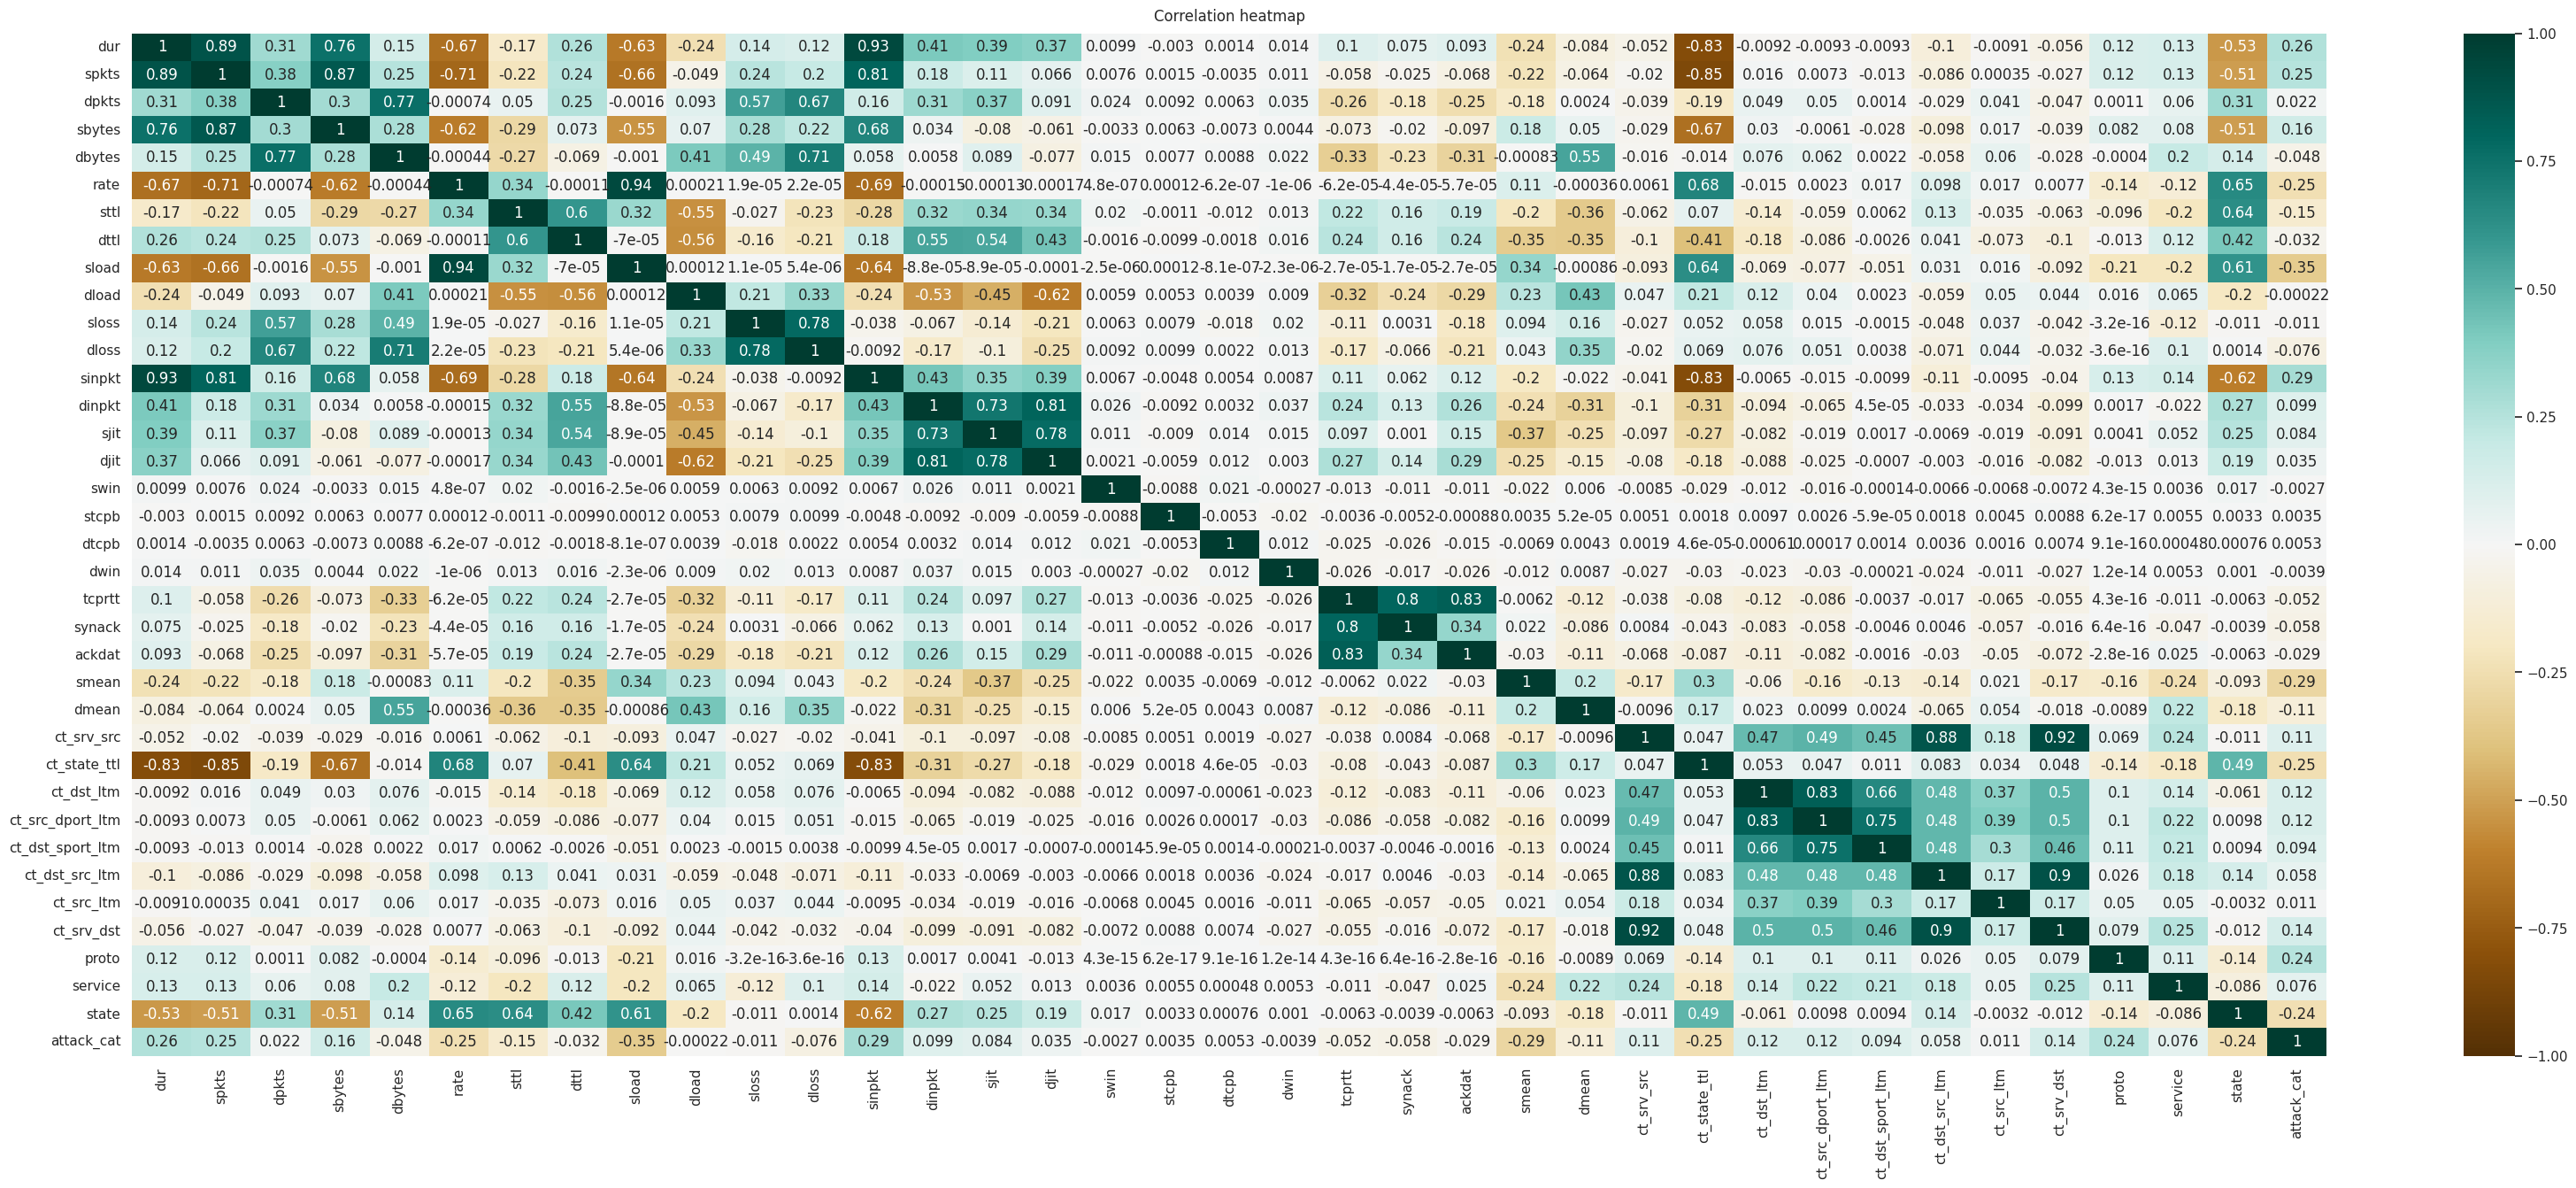

In [457]:
plt.figure(figsize=(40,15))
heatmap = sns.heatmap(df2.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation heatmap', fontdict={'fontsize': 12}, pad=10)
plt.show()

In [481]:
data_corr = df2.corr('pearson')['attack_cat'][:-1]
golden_features_list = data_corr[abs(data_corr) > 0.1].sort_values(ascending=False)
print("There is {} strongly correlated values with attack_cat:\n{}".format(len(golden_features_list), golden_features_list))

There is 16 strongly correlated values with attack_cat:
sinpkt              0.290906
dur                 0.259666
spkts               0.247239
proto               0.244416
sbytes              0.159558
ct_srv_dst          0.135944
ct_src_dport_ltm    0.120301
ct_dst_ltm          0.119370
ct_srv_src          0.105150
dmean              -0.110624
sttl               -0.153704
state              -0.244821
rate               -0.245492
ct_state_ttl       -0.248110
smean              -0.289457
sload              -0.346665
Name: attack_cat, dtype: float64


In [482]:
final_columns_lst = ['sinpkt', 'dur', 'spkts', 'proto', 'sbytes', 'ct_srv_dst', 'ct_src_dport_ltm', 'ct_dst_ltm', 'ct_srv_src', 'dmean', 'sttl', 'state', 'rate', 'ct_state_ttl', 'smean', 'sload', 'attack_cat']

Let's keep only the strongly correlated features and drop the rest from original dataframe which was normalized earlier.



In [487]:
df2 = df_bkup6.copy()

In [488]:
df2 = df2[final_columns_lst]

In [489]:
df2.columns

Index(['sinpkt', 'dur', 'spkts', 'proto', 'sbytes', 'ct_srv_dst',
       'ct_src_dport_ltm', 'ct_dst_ltm', 'ct_srv_src', 'dmean', 'sttl',
       'state', 'rate', 'ct_state_ttl', 'smean', 'sload', 'attack_cat'],
      dtype='object')

In [490]:
df2.shape

(32611, 17)

In [491]:
df2.head()

sinpkt       dur     spkts     proto    sbytes  ct_srv_dst  \
0   0.178643  0.073388  0.238095  0.842975  0.081272    0.203765   
33  0.000184  0.000015  0.047619  0.892562  0.049470    0.153846   
36  0.000110  0.000009  0.047619  0.892562  0.049470    0.076923   
38  0.289666  0.214196  0.428571  0.842975  0.349117    0.153846   
42  0.000059  0.000005  0.047619  0.892562  0.049470    0.038462   

    ct_src_dport_ltm  ct_dst_ltm  ct_srv_src     dmean      sttl     state  \
0            0.19868    0.149523    0.202010  0.193694  0.988235  0.333333   
33           0.19868    0.149523    0.384615  0.291917  0.996078  0.500000   
36           0.19868    0.149523    0.230769  0.291917  0.996078  0.500000   
38           0.19868    0.149523    0.384615  0.202703  0.996078  0.333333   
42           0.19868    0.149523    0.230769  0.291917  0.996078  0.500000   

        rate  ct_state_ttl     smean     sload attack_cat  
0   0.000296      0.614674  0.110294  0.000064     Normal  
33  0.160000      0.666667  0.411765  0.121081     Normal  
36  0.266667      0.666667  0.411765  0.201802     Normal  
38  0.000169      0.333333  0.544118  0.000093     Normal  
42  0.500000      0.666667  0.411765  0.378378     Normal

In [492]:
X= df2.drop('attack_cat', axis=1).values
y = df2['attack_cat'].values
# Stratify parameter makes a split so that the proportion of values in the sample produced
# will be the same as the proportion of values provided to parameter stratify.
# For example, if variable y is a binary categorical variable with values 0 and 1 and
# there are 25% of zeros and 75% of ones,stratify=y will make sure that your random split
# has 25% of 0's and 75% of 1's.
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0, stratify=y)

In [493]:
#Create a Multinomial Classifier
MultinomialModel = MultinomialNB()

# Train the model using the training sets
MultinomialModel.fit(X_train, y_train)

MultinomialNB()

In [494]:
#Predict on test data
y_pred_m= MultinomialModel.predict(X_test)

In [495]:
#Evaluate Results
cm=confusion_matrix(y_test,y_pred_m)
cm

array([[   0,    0,    0,  198,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,  199,    5,    0,    8,    0,    0,    0],
       [   0,    0,    0, 1318,    7,    0,   38,    0,    0,    0],
       [   0,    0,    0, 1700,   16,    0,  181,    0,    0,    0],
       [   0,    0,    0,  494,   27,    0,  276,    0,    0,    0],
       [   0,    0,    0,  327,    1,   18,    5,    0,    0,    0],
       [   0,    0,    0,  260,   16,    0,  324,    0,    0,    0],
       [   0,    0,    0,  788,    1,    0,  217,    0,    0,    0],
       [   0,    0,    0,   60,   19,    0,   19,    0,    0,    0],
       [   0,    0,    0,    0,    1,    0,    0,    0,    0,    0]])

In [496]:
print('Multinomial Accuracy = ', accuracy_score(y_test,y_pred_m))

Multinomial Accuracy =  0.31718534416679445


In [497]:
#Create a Bernoulli Classifier
BernoulliModel = BernoulliNB()

In [498]:
# Train the model using the training sets
BernoulliModel.fit(X_train, y_train)

BernoulliNB()

In [499]:
#Predict on test data
y_pred_b= BernoulliModel.predict(X_test)

In [500]:
#Evaluate Results
cm=confusion_matrix(y_test,y_pred_b)
cm

array([[   0,    0,    0,  198,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,  204,    0,    0,    8,    0,    0,    0],
       [   0,    0,    0, 1345,    0,    0,   18,    0,    0,    0],
       [   0,    0,    0, 1858,    0,    0,   39,    0,    0,    0],
       [   0,    0,    0,  795,    0,    0,    2,    0,    0,    0],
       [   0,    0,    0,  350,    0,    0,    1,    0,    0,    0],
       [   0,    0,    0,  427,    0,    0,  173,    0,    0,    0],
       [   0,    0,    0, 1003,    0,    0,    3,    0,    0,    0],
       [   0,    0,    0,   98,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    1,    0,    0,    0,    0,    0,    0]])

In [501]:
print('Bernoulli Accuracy = ', accuracy_score(y_test,y_pred_b))

Bernoulli Accuracy =  0.31135980377127087


In [502]:
#Create a Gaussian Classifier
GaussianModel = GaussianNB()

# Train the model using the training sets
GaussianModel.fit(X_train, y_train)

GaussianNB()

In [503]:
#Predict on test data
y_pred_g= GaussianModel.predict(X_test)

In [504]:
#Evaluate Results
cm=confusion_matrix(y_test,y_pred_g)
cm

array([[ 191,    0,    1,    0,    0,    1,    0,    0,    5,    0],
       [ 179,    0,    3,    0,    2,    5,    6,    0,   17,    0],
       [1230,    0,   12,    2,    4,   38,   25,    0,   52,    0],
       [1541,    0,   42,    2,   16,   51,  109,    0,  136,    0],
       [ 218,    0,    4,    0,  131,  135,   29,    1,  279,    0],
       [  36,    0,    2,    0,    0,  297,    2,    0,   14,    0],
       [   8,    6,    0,    2,   63,   92,  262,    9,  158,    0],
       [ 255,    0,    2,    0,    2,   15,    3,    0,  729,    0],
       [   6,    0,    0,    0,    0,    1,    0,    0,   91,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    1,    0]])

In [505]:
print('GaussianNB Accuracy = ', accuracy_score(y_test,y_pred_g))

GaussianNB Accuracy =  0.15115744289437374


In [506]:
model_lr_2 = LogisticRegression()

In [507]:
model_lr_2.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [508]:
y_pred_lr = model_lr_2.predict(X_test)

In [509]:
accuracy_score(y_test, y_pred_lr)

0.46987582400735856

<font color="orange">Observations: </font>
<font color="darkcyan">As you can see after feature reduction the accuracy score reduced.</font>